# Pasos Previos

In [34]:
# Cargamos todas las librerías necesarias

## Básicas
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preparación
from sklearn.preprocessing import MinMaxScaler


## Generación del archivo csv que necesitaremos

In [1]:
# Importamos el JSON

url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

In [2]:
df_plano = pd.json_normalize(data)
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [3]:
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
df_plano.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [5]:
# Cambiando la columna "account.Charges.Total" a Float

df_plano['account.Charges.Total'] = pd.to_numeric(df_plano['account.Charges.Total'], errors='coerce')
print(df_plano['account.Charges.Total'].dtype)

float64


In [6]:
# Eliminando las columnas de Churn

df_plano = df_plano[df_plano['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_plano))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [7]:
# Verificamos vacíos o en blanco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [8]:
df_plano.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df_plano['Total.Day'] = ((df_plano['account.Charges.Total'] /  df_plano['customer.tenure']) / 30).round(2)

/tmp/ipython-input-625968312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano['Total.Day'] = ((df_plano['account.Charges.Total'] /  df_plano['customer.tenure']) / 30).round(2)


In [11]:
df_plano.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Total.Day'],
      dtype='object')

In [12]:
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7044 entries, 0 to Cuentas_Diarias
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   float64
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   float64
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null  

In [13]:
# Movemos la columna 'Total.Day'
df_plano.insert(19, 'Total.Day',  df_plano.pop('Total.Day'))

In [14]:
# Verificamos...
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7044 entries, 0 to Cuentas_Diarias
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   float64
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   float64
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null  

In [16]:
# Finalmente, generamos el csv que necesitamos
df_plano.to_csv("datos_tratados.csv", index=False)

# 🎯 La Misión

Tu nueva misión es desarrollar modelos predictivos capaces de __prever qué clientes tienen mayor probabilidad de cancelar sus servicios__ (churn).

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.


# Procesamiento del archivo csv para Challenge Parte 2

## Leemos el archivo

In [17]:
df = pd.read_csv('/content/datos_tratados.csv')

In [18]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   float64
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   float64
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

## 🛠️ Preparación de los Datos##


In [20]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [21]:
# Eliminación de Columnas Irrelevantes
# el Id del cliente no tiene ninguna relevancia para entrenar nuestros modelos, no es un dato que se correlacione con la variable objetivo, por lo que NO es un feature.

df = df.drop(columns=["customerID"])

In [22]:
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [23]:
# para crear un nuevo DF
df_clean = df.copy()

cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

# === Etapa 1: Agrupar "No internet service" como "No"
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,9.0,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,9.0,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,4.0,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,13.0,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,3.0,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,0.0,22.0,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0.0,2.0,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0.0,67.0,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True
7042,0.0,63.0,1.96,59.00,3707.60,False,True,True,True,False,...,True,False,True,True,False,True,False,False,True,False


## Verificación nuevamente de los valores nulos

In [24]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,1
customer.tenure,1
Total.Day,12
account.Charges.Monthly,1
account.Charges.Total,12
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [25]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                12
account.Charges.Total    12
dtype: int64


In [26]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [27]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## Normalización/Estandarización

In [29]:
# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
columnas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

/tmp/ipython-input-784306299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   float64
 1   customer.tenure                                7032 non-null   float64
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   phone.PhoneService_Yes                         7032 non-n

## Correlación entre las variables

In [31]:
corr = df_encoded.corr()

In [32]:
corr

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
customer.SeniorCitizen,1.000000,0.015683,0.217622,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,...,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
customer.tenure,0.015683,1.000000,0.246210,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,...,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
Total.Day,0.217622,0.246210,1.000000,0.996227,0.650921,0.192030,-0.014477,0.097159,-0.112514,0.247900,...,0.481736,0.338021,0.626474,0.626058,0.005252,-0.072454,0.349467,0.029974,0.270270,-0.374906
account.Charges.Monthly,0.219874,0.246862,0.996227,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
account.Charges.Total,0.102411,0.825880,0.650921,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn_Yes,0.150541,-0.354049,0.192030,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,...,-0.066193,-0.164716,0.063254,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
customer.gender_Male,-0.001819,0.005285,-0.014477,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,...,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
customer.Partner_Yes,0.016957,0.381912,0.097159,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,...,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
customer.Dependents_Yes,-0.210550,0.163386,-0.112514,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,...,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
phone.PhoneService_Yes,0.008392,0.007877,0.247900,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,...,-0.070076,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


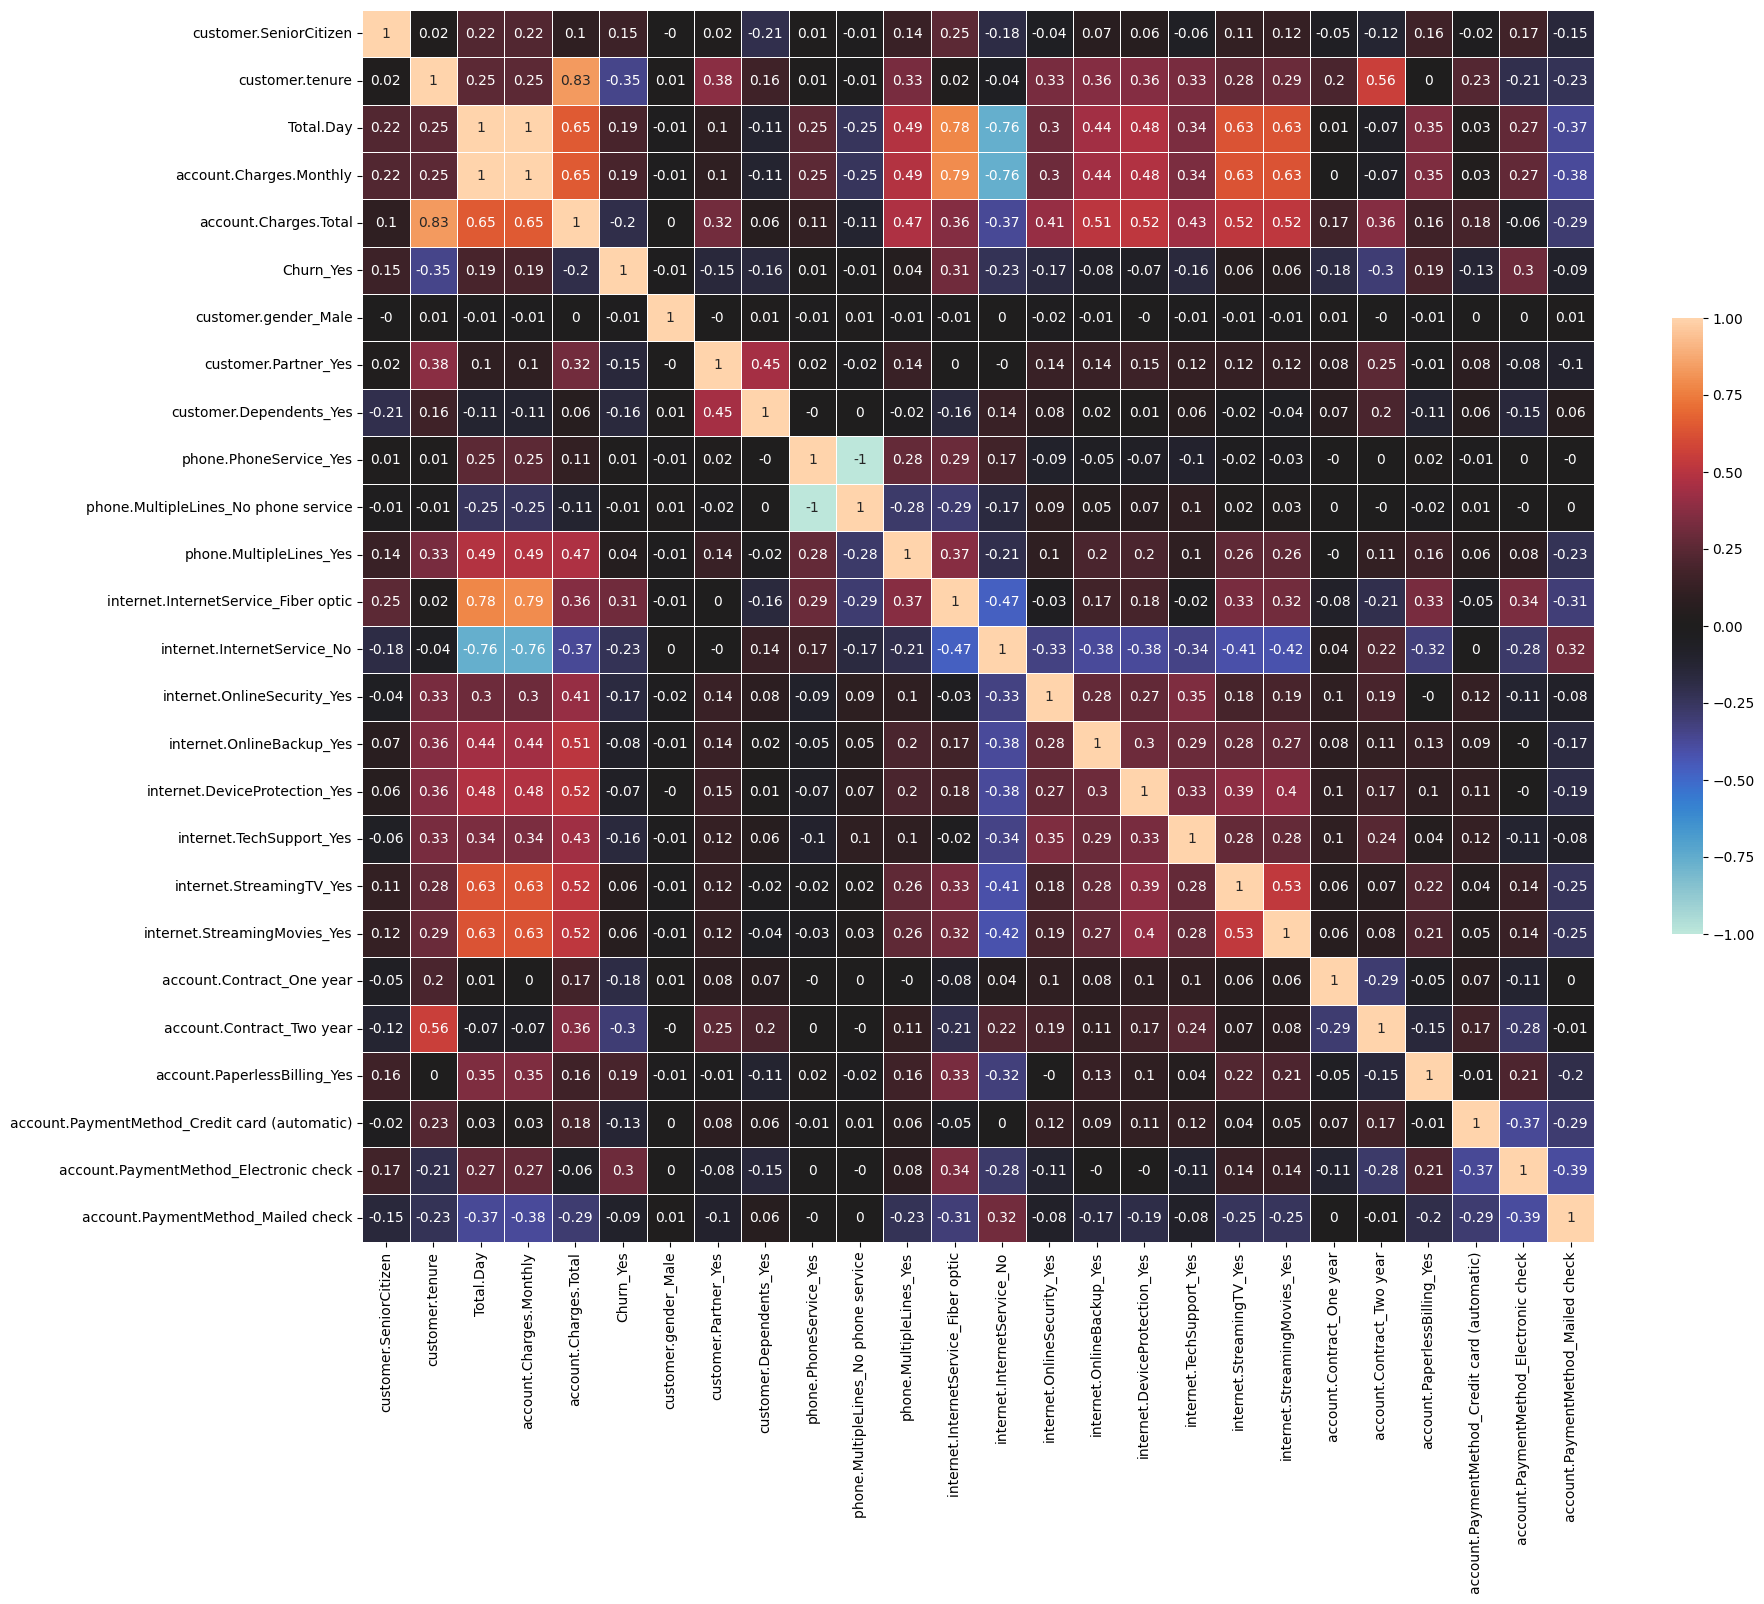

In [35]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   float64
 1   customer.tenure                                7032 non-null   float64
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   phone.PhoneService_Yes                         7032 non-n

##  Análisis de Multicolinealidad

In [39]:
# Seleccionar las variables independientes
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.

X = df_encoded.drop(columns=['Churn_Yes'])

In [41]:
#Añadir constante (intercepto)
X_const = add_constant(X)

# Reemplazar infinitos por NaN
X_const = X_const.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_const = X_const.dropna()

In [42]:
# Calcular el VIF
# Convertir columnas boolean a enteros (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,893.801679
12,internet.InternetService_Fiber optic,148.489528
3,Total.Day,133.569255
13,internet.InternetService_No,104.213964
19,internet.StreamingMovies_Yes,24.155141
18,internet.StreamingTV_Yes,24.033815
5,account.Charges.Total,10.871303
2,customer.tenure,7.613409


In [43]:
# Eliminamos columna "phone.PhoneService_Yes"
df_encoded.drop(columns=["phone.PhoneService_Yes"], inplace=True)

/tmp/ipython-input-3800610168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(columns=["phone.PhoneService_Yes"], inplace=True)


In [47]:
# Verificar y eliminar columnas:Charges.Monthly, Charges.Total y Total.Day
#df_encoded.drop(columns=["account.Charges.Monthly", "account.Charges.Total", "Total.Day"], inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   float64
 1   customer.tenure                                7032 non-null   float64
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   phone.MultipleLines_No phone service           7032 non-n

In [48]:
# Mantener solo una de las variables entre InternetService_Fiber optic, InternetService_No
# df_encoded.drop(columns=["internet.InternetService_Fiber optic"], inplace=True)


In [49]:
# Eliminamos columnas adicionales

df_encoded.drop(columns=["phone.MultipleLines_No phone service"], inplace=True)
df_encoded.drop(columns=["Total.Day"], inplace=True)

/tmp/ipython-input-3640102906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(columns=["phone.MultipleLines_No phone service"], inplace=True)
/tmp/ipython-input-3640102906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(columns=["Total.Day"], inplace=True)


In [71]:
#Evaluar si es necesario mantener todas las variables derivadas de internet (streaming, seguridad, etc.).
#Verificar si Charges.Total puede ser recalculado, si ya existen Monthly y tenure.

In [50]:
# Verificamos nuevamente el VIF

X = df_encoded.drop(columns=['Churn_Yes'])
# Añadir constante (intercepto)
X_const = add_constant(X)

# Reemplazar infinitos por NaN
X_const = X_const.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_const = X_const.dropna()
#Calcular el VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
0,const,26.666688
4,account.Charges.Total,10.805164
3,account.Charges.Monthly,7.905479
2,customer.tenure,7.576337
9,internet.InternetService_No,3.352248
17,account.Contract_Two year,2.643521
20,account.PaymentMethod_Electronic check,1.968983
14,internet.StreamingTV_Yes,1.859108
21,account.PaymentMethod_Mailed check,1.855452
15,internet.StreamingMovies_Yes,1.849434


In [51]:
# La columna "account.Charges.Total" aún tiene un VIF muy alto, también la eliminamos...
df_encoded.drop(columns=["account.Charges.Total"], inplace=True)

/tmp/ipython-input-751273153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(columns=["account.Charges.Total"], inplace=True)


In [52]:
# Verificamos nuevamente el VIF...

X = df_encoded.drop(columns=['Churn_Yes'])
# Añadir constante (intercepto)
X_const = add_constant(X)

# Reemplazar infinitos por NaN
X_const = X_const.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_const = X_const.dropna()
#Calcular el VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
0,const,20.535369
3,account.Charges.Monthly,5.758193
8,internet.InternetService_No,3.292440
2,customer.tenure,2.807295
16,account.Contract_Two year,2.623890
19,account.PaymentMethod_Electronic check,1.966860
13,internet.StreamingTV_Yes,1.852898
14,internet.StreamingMovies_Yes,1.841711
20,account.PaymentMethod_Mailed check,1.836571
15,account.Contract_One year,1.618927


## Conclusión

Aún la columna "account.Charges.Monthly" posee un VIF mayor de lo deseado, eventualmente esta columna deberá ser eliminada o recalculada, lo dejamos para más adelante...

##  Modelos Predictivos

In [54]:
# Separar features y target... se viene lo bueno!

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [56]:
# Dividimos entrenamiento y prueba: 30% Testing, 70% Training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Observación: necesitamos aplicar shuffle?

**Normalizar**

In [57]:
# Aplicamos Scaler para los modelos que lo requieren, qué sensibles!!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Estas son pruebas iniciales, más adelante nos daremos cuenta que necesitamos automatizar este proceso para realizar un óptimo Grid Search!

In [58]:
# Balancear con SMOTE (solo en train)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [59]:
print("Distribución antes de SMOTE:", y_train.value_counts().to_dict())
print("Distribución después de SMOTE:", {0: sum(y_train_bal==0), 1: sum(y_train_bal==1)})


Distribución antes de SMOTE: {False: 3614, True: 1308}
Distribución después de SMOTE: {0: 3614, 1: 3614}



Matriz de confusión:
 [[961 588]
 [ 72 489]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.93      0.62      0.74      1549
        True       0.45      0.87      0.60       561

    accuracy                           0.69      2110
   macro avg       0.69      0.75      0.67      2110
weighted avg       0.80      0.69      0.71      2110

ROC AUC: 0.8333551978218366


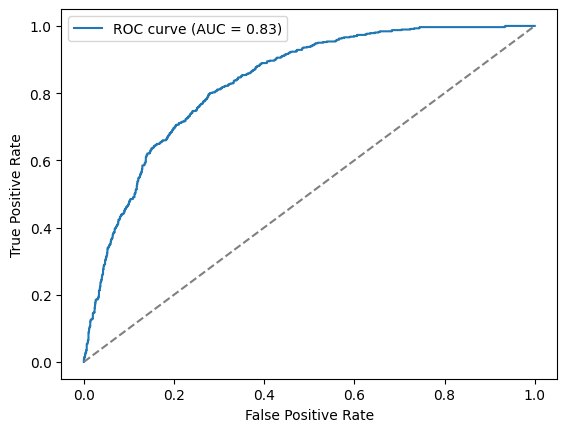

In [65]:
# Entrenar el modelo y evauar méricas

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Evaluar en test (sin SMOTE)
y_pred = log_reg.predict(X_test_scaled)
y_proba_smote = log_reg.predict_proba(X_test_scaled)[:,1]

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba_smote))

# Curva ROC
## ROC significa Receiver Operating Characteristic (en español: Característica Operativa del Receptor)
fpr, tpr, _ = roc_curve(y_test, y_proba_smote)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba_smote))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



## ¿Qué significa ROC?

**ROC** significa **Receiver Operating Characteristic** (*Característica Operativa del Receptor*).

Es una curva utilizada para evaluar el rendimiento de un modelo de **clasificación binaria**, especialmente útil cuando las clases están desequilibradas.

---

### 🔍 ¿Qué muestra la curva ROC?

La curva ROC representa el comportamiento del modelo al variar el umbral de decisión. Traza dos métricas clave:

- **Eje X:** Tasa de falsos positivos (**FPR** – *False Positive Rate*)  
  `FPR = FP / (FP + TN)`

- **Eje Y:** Tasa de verdaderos positivos (**TPR** – *True Positive Rate* o *Recall*)  
  `TPR = TP / (TP + FN)`

Cada punto de la curva corresponde a un umbral distinto de clasificación.

---

### ✅ ¿Qué tan buena es una curva ROC?

- Una curva más cerca del **vértice superior izquierdo** indica un mejor modelo.
- El área bajo la curva (**AUC**, por *Area Under the Curve*) resume el rendimiento general:

| AUC Score | Interpretación           |
|-----------|--------------------------|
| 0.90 – 1  | Excelente                 |
| 0.80 – 0.90 | Muy bueno / Bueno       |
| 0.70 – 0.80 | Aceptable               |
| 0.60 – 0.70 | Pobre                   |
| 0.50 – 0.60 | Muy pobre / Aleatorio  |
---

### 📊 ¿Por qué es útil?

La curva ROC es útil porque:

- Es independiente del umbral de decisión.
- Funciona bien incluso con clases desbalanceadas.
- Permite

---

### Finalmente, un ROC AUC de 0.838 indica:
- El modelo **discrimina bien entre clases**, lo que lo hace útil para tareas donde se necesita priorizar la detección precisa.
- No es perfecto, pero sí confiable para muchas aplicaciones.

> ⚠️ Importante: un buen AUC no garantiza que otras métricas como **precisión**, **recall** o **F1-score** también sean altas. Siempre es recomendable analizar múltiples métricas para una evaluación completa.


## Conclusión (parcial)

## 🎯 Análisis de la Matriz de Confusión (Cancelación de Clientes)

### Objetivo del Modelo
Prever qué clientes tienen **mayor probabilidad de cancelar sus servicios (churn)**, con el fin de aplicar medidas preventivas.

---

### 📊 Matriz de Confusión

|                          | Predicho: No Cancela (0) | Predicho: Cancela (1) |
|--------------------------|--------------------------|------------------------|
| **Real: No Cancela (0)** | 1119 (TN)                | 430 (FP)              |
| **Real: Cancela (1)**    | 122 (FN)                 | 439 (TP)              |

---

### 🧠 Interpretación

- **TP (439)** – Clientes que **sí cancelaron** y fueron **detectados correctamente**.
- **FN (122)** – Clientes que **sí cancelaron** pero **no fueron detectados**.  
  ⚠️ **Muy importante reducir este valor.**
- **FP (430)** – Clientes que **no cancelaron** pero el modelo predijo que sí.  
  🟡 Puede llevar a intervenciones innecesarias.
- **TN (1119)** – Clientes que **no cancelaron** y fueron correctamente ignorados.

---

### 📈 Métricas Relevantes

| Métrica      | Fórmula                                               | Resultado | Interpretación |
|--------------|--------------------------------------------------------|-----------|----------------|
| **Recall**   | `TP / (TP + FN) = 439 / (439 + 122)`                  | ≈ `0.78`  | El **78% de los clientes que cancelaron fueron detectados**. |
| **Precision**| `TP / (TP + FP) = 439 / (439 + 430)`                  | ≈ `0.505` | Solo el **50.5% de los alertados realmente cancelan**. |
| **Accuracy** | `(TP + TN) / Total = (439 + 1119) / 2110`             | ≈ `0.736` | Precisión general del modelo. |
| **F1-score** | `2 * (Precision * Recall) / (Precision + Recall)`     | ≈ `0.613`         | Balance entre precision y recall.  |

---

### ✅ Recomendaciones Estratégicas

1. **Reducir los False Negatives (FN)**:  
   - Estos representan clientes que **cancelaron sin haber sido detectados**.
   - Ajustar el umbral del modelo puede aumentar la sensibilidad (**recall**).

2. **Analizar los False Positives (FP)**:  
   - Clientes que **no iban a cancelar**, pero fueron erróneamente marcados.
   - Investigar si hay patrones comunes (segmentos, productos, etc.).

3. **Segmentar las alertas por probabilidad de churn**:  
   - Alta probabilidad → Contacto proactivo.
   - Media probabilidad → Incentivos o monitoreo.
   - Baja probabilidad → Sin intervención inmediata.

---



## 📌 Conclusión Importante

Para problemas de churn, donde es **más costoso perder clientes sin prevenirlo** (False Negative), priorizar el **Recall** es la estrategia inicial a seguir y, por lo tanto, debiese ser la principal métrica a considerar para evaluar el mejor modelo.

Otra forma de ver, el **Recall** es la mayor cantidad de clientes que sí van a cancelar (clase positiva `1`), es decir, esta es la métrica que debemos maximizar, entonces, según la fórmula del Recall [TP / (TP + FN)], se debe encontrar un modelo con alto TP (True Positive: detección correcta de clientes que van a cancelar) y bajo FN (False Negative: clientes que sí van a cancelar, pero que el modelo no los detecta).




## IMPORTANTE: Grid Search

Tras este análisis nos hacemos la siguiente pregunta, lograremos mejores resultados con otros hiperparámetros?
Actualmente usamos max_iter=1000 y random_state=42, podemos averiguar cuáles son los rangos óptimos de estos parámetros (min/max), esto genera una matriz MxN de posibles combinaciones (2 dimensiones por ser dos hiperparámetros), por lo tanto, es primordial poder evaluar todos estos hiperparámetros para detectar el **modelo óptimo**, pero hacer esto en forma manual es imposible, por ello, más adelante deberemos implementar la funcionalidad Grid Search automatizada, es decir, una función python que evalúe automáticamente (genere, entrene y valide las métricas) los modelos que se pueden obtener con la combinación de hiperparámetros.

Por ahora, evaluaremos otras alternativas a SMOTE como algoritmo de balanceo.

## Modelo SMOTEENN


Matriz de confusión:
 [[961 588]
 [ 72 489]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.93      0.62      0.74      1549
        True       0.45      0.87      0.60       561

    accuracy                           0.69      2110
   macro avg       0.69      0.75      0.67      2110
weighted avg       0.80      0.69      0.71      2110

ROC AUC: 0.8333551978218366


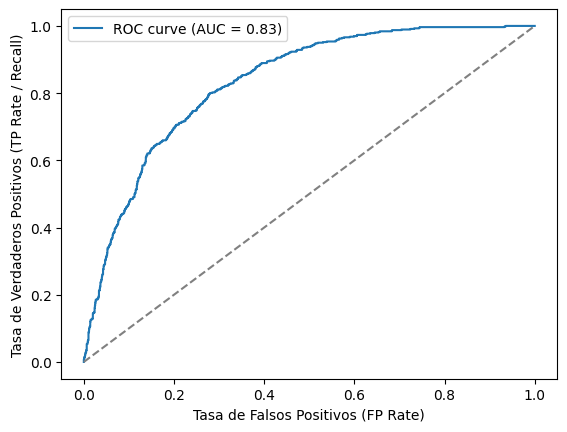

In [66]:
''' Esto no lo haremos, ya que usaremos los mismos set de datos que usamos para el SMOTE, peras con peras pue!
# División de datos y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

# Aplicar SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Evaluar en test
y_pred = log_reg.predict(X_test_scaled)
y_proba_smoteenn = log_reg.predict_proba(X_test_scaled)[:, 1]

# Reportes
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba_smoteenn))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_smoteenn)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba_smoteenn))
plt.plot([0,1],[0,1],'--',color='gray')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
# reemplazamos por nombres específicos
plt.xlabel("Tasa de Falsos Positivos (FP Rate)")
plt.ylabel("Tasa de Verdaderos Positivos (TP Rate / Recall)")
plt.legend()
plt.show()


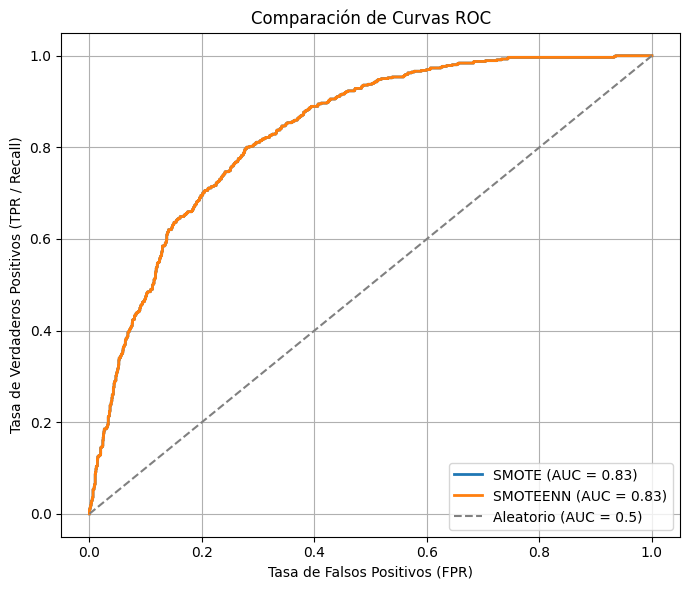

In [68]:
# **Graficar ambas curvas ROC**

# Curvas ROC
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
fpr_smoteenn, tpr_smoteenn, _ = roc_curve(y_test, y_proba_smoteenn)

# AUCs
auc_smote = roc_auc_score(y_test, y_proba_smote)
auc_smoteenn = roc_auc_score(y_test, y_proba_smoteenn)

# Graficar
plt.figure(figsize=(7, 6))
plt.plot(fpr_smote, tpr_smote, label=f"SMOTE (AUC = {auc_smote:.2f})", linewidth=2)
plt.plot(fpr_smoteenn, tpr_smoteenn, label=f"SMOTEENN (AUC = {auc_smoteenn:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color='gray', label="Aleatorio (AUC = 0.5)")

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR / Recall)")
plt.title("Comparación de Curvas ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# NOTA: No se aprecia diferencia entre ambas....

# Modelo SMOTE omek


Matriz de confusión:
 [[1120  429]
 [ 119  442]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.90      0.72      0.80      1549
        True       0.51      0.79      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

ROC AUC: 0.8378121011888529


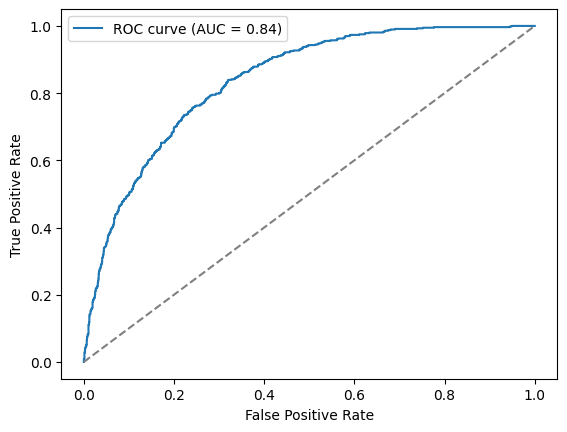

In [69]:
from imblearn.combine import SMOTETomek

''' acá tampoco hacemos esto...
# División de datos y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

# Aplicar SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_scaled, y_train)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Evaluar en test
y_pred = log_reg.predict(X_test_scaled)
y_proba_smotetomek = log_reg.predict_proba(X_test_scaled)[:, 1]

# Reportes
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba_smotetomek))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_smotetomek)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba_smotetomek))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Modelo RandomForest

In [84]:
'''
from sklearn.ensemble import RandomForestClassifier

# División y escalado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Evaluación
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("\n[Random Forest con SMOTE]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\n\n# División y escalado\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.3, random_state=42, stratify=y\n)\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# SMOTE\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nX_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)\n\n# Entrenar Random Forest\nrf = RandomForestClassifier(n_estimators=100, random_state=42)\nrf.fit(X_train_bal, y_train_bal)\n\n# Evaluación\ny_pred = rf.predict(X_test_scaled)\ny_proba = rf.predict_proba(X_test_scaled)[:, 1]\n\n# Resultados\nprint("\n[Random Forest con SMOTE]")\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\nprint("ROC AUC:", roc_auc_score(y_test, y_proba))\n'

In [85]:

from imblearn.combine import SMOTEENN

# SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train_scaled, y_train)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Evaluación
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("\n[Random Forest con SMOTEENN]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



[Random Forest con SMOTEENN]
[[1089  460]
 [ 113  448]]
              precision    recall  f1-score   support

       False       0.91      0.70      0.79      1549
        True       0.49      0.80      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.74      2110

ROC AUC: 0.8263528076880144


In [86]:
from imblearn.combine import SMOTETomek

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_scaled, y_train)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Evaluación
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Resultados
print("\n[Random Forest con SMOTETomek]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



[Random Forest con SMOTETomek]
[[1299  250]
 [ 247  314]]
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1549
        True       0.56      0.56      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110

ROC AUC: 0.8120637890698271


In [87]:
# Entrenar
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# --- Evaluar en entrenamiento ---
y_train_pred = rf.predict(X_train_bal)
y_train_proba = rf.predict_proba(X_train_bal)[:, 1]

print("\n[Random Forest con SMOTETomek]")
print("\n--- ENTRENAMIENTO ---")
print(confusion_matrix(y_train_bal, y_train_pred))
print(classification_report(y_train_bal, y_train_pred))
print("ROC AUC (Train):", roc_auc_score(y_train_bal, y_train_proba))

# --- Evaluar en test ---
y_test_pred = rf.predict(X_test_scaled)
y_test_proba = rf.predict_proba(X_test_scaled)[:, 1]

print("\n--- TEST ---")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("ROC AUC (Test):", roc_auc_score(y_test, y_test_proba))



[Random Forest con SMOTETomek]

--- ENTRENAMIENTO ---
[[3432    4]
 [   3 3433]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3436
        True       1.00      1.00      1.00      3436

    accuracy                           1.00      6872
   macro avg       1.00      1.00      1.00      6872
weighted avg       1.00      1.00      1.00      6872

ROC AUC (Train): 0.9999841183741011

--- TEST ---
[[1299  250]
 [ 247  314]]
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1549
        True       0.56      0.56      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110

ROC AUC (Test): 0.8120637890698271


In [88]:
# Funcion generica para evaluacion de modelos.
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre_modelo="", entrenar=True, imprimir=True):
    """
    Evalúa un modelo en conjuntos de entrenamiento y test, y devuelve métricas clave.

    Args:
        modelo: modelo de sklearn ya instanciado.
        X_train, y_train: datos de entrenamiento (ya balanceados si aplica).
        X_test, y_test: datos de prueba (no balanceados).
        nombre_modelo: string para mostrar en los prints.
        entrenar: si True, se ajusta el modelo con los datos de entrenamiento.
        imprimir: si True, imprime los resultados en consola.

    Returns:
        dict con métricas de entrenamiento y test.
    """

    if entrenar:
        modelo.fit(X_train, y_train)

    # --- Predicciones ---
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    y_train_proba = modelo.predict_proba(X_train)[:, 1]
    y_test_proba = modelo.predict_proba(X_test)[:, 1]

    # --- Métricas ---
    resultados = {
        "modelo": nombre_modelo,

        "train_accuracy": accuracy_score(y_train, y_train_pred),
        "train_precision": precision_score(y_train, y_train_pred),
        "train_recall": recall_score(y_train, y_train_pred),
        "train_f1": f1_score(y_train, y_train_pred),
        "train_auc": roc_auc_score(y_train, y_train_proba),
        "train_confusion": confusion_matrix(y_train, y_train_pred),

        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "test_precision": precision_score(y_test, y_test_pred),
        "test_recall": recall_score(y_test, y_test_pred),
        "test_f1": f1_score(y_test, y_test_pred),
        "test_auc": roc_auc_score(y_test, y_test_proba),
        "test_confusion": confusion_matrix(y_test, y_test_pred),
    }

    if imprimir:
        print(f"\n🔍 Modelo: {nombre_modelo}")
        print("\n--- ENTRENAMIENTO ---")
        print("Confusion Matrix:\n", resultados["train_confusion"])
        print(f"Accuracy: {resultados['train_accuracy']:.4f}")
        print(f"Precision: {resultados['train_precision']:.4f}")
        print(f"Recall: {resultados['train_recall']:.4f}")
        print(f"F1-score: {resultados['train_f1']:.4f}")
        print(f"ROC AUC: {resultados['train_auc']:.4f}")

        print("\n--- TEST ---")
        print("Confusion Matrix:\n", resultados["test_confusion"])
        print(f"Accuracy: {resultados['test_accuracy']:.4f}")
        print(f"Precision: {resultados['test_precision']:.4f}")
        print(f"Recall: {resultados['test_recall']:.4f}")
        print(f"F1-score: {resultados['test_f1']:.4f}")
        print(f"ROC AUC: {resultados['test_auc']:.4f}")

    return resultados

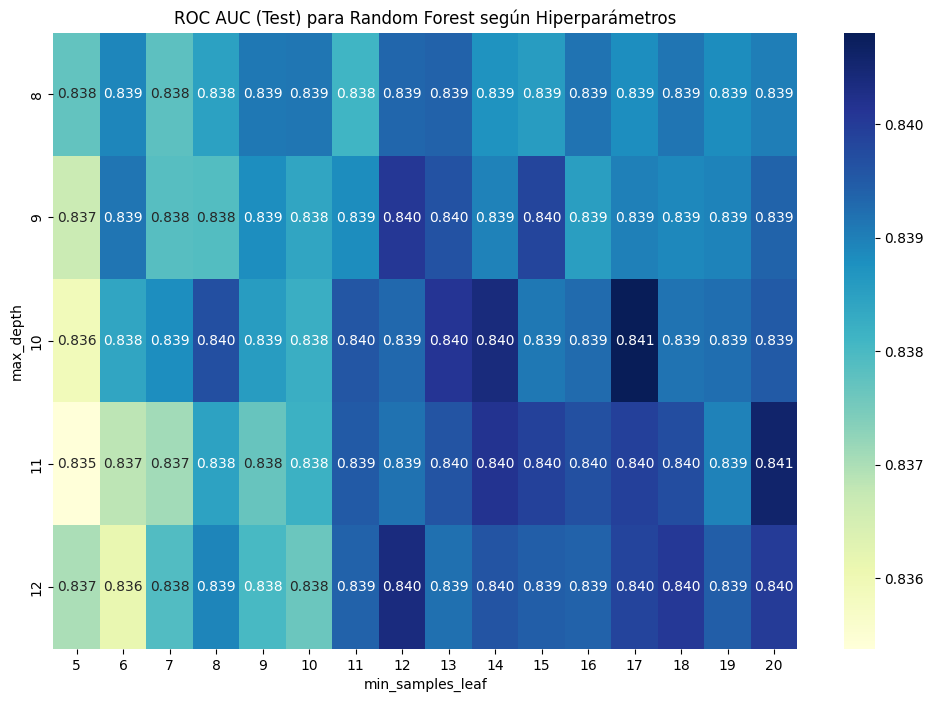

In [89]:
# Generar todas las combinaciones de hiperparámetros

from itertools import product

depth_range = range(8, 13)  # 8 to 12 inclusive
leaf_range = range(5, 21)   # 5 to 20 inclusive

combinaciones = list(product(depth_range, leaf_range))

# Entrenar y evaluar cada combinación

resultados_grid = []


for max_depth, min_samples_leaf in combinaciones:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    resultados = evaluar_modelo(
        rf,
        X_train_bal, y_train_bal,
        X_test_scaled, y_test,
        nombre_modelo=f"RF_depth{max_depth}_leaf{min_samples_leaf}",
        entrenar=True,
        imprimir=False  # evitamos imprimir en cada iteración
    )

    resultados["max_depth"] = max_depth
    resultados["min_samples_leaf"] = min_samples_leaf
    resultados_grid.append(resultados)

# Convertir a DataFrame para análisis

df_resultados = pd.DataFrame(resultados_grid)

# Visualizar los resultados con un heatmap

pivot_auc = df_resultados.pivot(index="max_depth", columns="min_samples_leaf", values="test_auc")


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_auc, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("ROC AUC (Test) para Random Forest según Hiperparámetros")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")
plt.show()




In [90]:
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from itertools import product

def buscar_mejor_modelo_rf(X_train_bal, y_train_bal, X_test_scaled, y_test,
                           max_depth_range=range(8, 13),
                           min_samples_leaf_range=range(5, 21),
                           criterio='test_auc',  # puede ser 'test_f1', 'test_recall', etc.
                           mostrar_heatmap=True):
    """
    Itera sobre combinaciones de hiperparámetros y encuentra el mejor modelo según una métrica.

    Returns:
        df_resultados: DataFrame con todas las métricas.
        mejor_resultado: dict con hiperparámetros y métricas del mejor modelo.
    """

    combinaciones = list(product(max_depth_range, min_samples_leaf_range))
    resultados = []

    for max_depth, min_samples_leaf in combinaciones:
        modelo = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        resultado = evaluar_modelo(
            modelo,
            X_train_bal, y_train_bal,
            X_test_scaled, y_test,
            nombre_modelo=f"RF_depth{max_depth}_leaf{min_samples_leaf}",
            entrenar=True,
            imprimir=False
        )

        resultado["max_depth"] = max_depth
        resultado["min_samples_leaf"] = min_samples_leaf
        resultados.append(resultado)

    df_resultados = pd.DataFrame(resultados)

    # Encontrar el mejor modelo según el criterio elegido
    mejor_idx = df_resultados[criterio].idxmax()
    mejor_resultado = df_resultados.loc[mejor_idx].to_dict()

    # Mostrar heatmap si se desea
    if mostrar_heatmap:
        pivot = df_resultados.pivot(
            index="max_depth",
            columns="min_samples_leaf",
            values=criterio
        )
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
        plt.title(f"Mapa de calor: {criterio} según hiperparámetros")
        plt.xlabel("min_samples_leaf")
        plt.ylabel("max_depth")
        plt.tight_layout()
        plt.show()

    print(f"\n✅ Mejor modelo encontrado (según {criterio}):")
    print(f"  - max_depth: {mejor_resultado['max_depth']}")
    print(f"  - min_samples_leaf: {mejor_resultado['min_samples_leaf']}")
    print(f"  - {criterio}: {mejor_resultado[criterio]:.4f}")

    return df_resultados, mejor_resultado
'''

'\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom sklearn.ensemble import RandomForestClassifier\nfrom itertools import product\n\ndef buscar_mejor_modelo_rf(X_train_bal, y_train_bal, X_test_scaled, y_test,\n                           max_depth_range=range(8, 13),\n                           min_samples_leaf_range=range(5, 21),\n                           criterio=\'test_auc\',  # puede ser \'test_f1\', \'test_recall\', etc.\n                           mostrar_heatmap=True):\n    """\n    Itera sobre combinaciones de hiperparámetros y encuentra el mejor modelo según una métrica.\n\n    Returns:\n        df_resultados: DataFrame con todas las métricas.\n        mejor_resultado: dict con hiperparámetros y métricas del mejor modelo.\n    """\n\n    combinaciones = list(product(max_depth_range, min_samples_leaf_range))\n    resultados = []\n\n    for max_depth, min_samples_leaf in combinaciones:\n        modelo = RandomForestClassifier(\n            n_est

In [91]:
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from itertools import product
from sklearn.preprocessing import MinMaxScaler

def buscar_mejor_modelo_rf_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,
                                max_depth_range=range(8, 13),
                                min_samples_leaf_range=range(5, 21),
                                mostrar_heatmap=True):
    """
    Busca el mejor modelo RandomForest según múltiples métricas, sin intervención del usuario.

    Devuelve:
        - df_resultados: DataFrame con todas las métricas y rankings
        - mejor_resultado: dict con hiperparámetros y métricas del mejor modelo
    """

    combinaciones = list(product(max_depth_range, min_samples_leaf_range))
    resultados = []

    for max_depth, min_samples_leaf in combinaciones:
        modelo = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        resultado = evaluar_modelo(
            modelo,
            X_train_bal, y_train_bal,
            X_test_scaled, y_test,
            nombre_modelo=f"RF_depth{max_depth}_leaf{min_samples_leaf}",
            entrenar=True,
            imprimir=False
        )

        resultado["max_depth"] = max_depth
        resultado["min_samples_leaf"] = min_samples_leaf
        resultados.append(resultado)

    df = pd.DataFrame(resultados)

    # --- Normalizar las métricas que queremos considerar ---
    metricas_clave = ["test_auc", "test_f1", "test_recall", "test_precision", "test_accuracy"]
    scaler = MinMaxScaler()
    df_norm = pd.DataFrame(scaler.fit_transform(df[metricas_clave]), columns=metricas_clave)

    # --- Calcular ranking promedio ---
    df["ranking_promedio"] = df_norm.mean(axis=1)

    # --- Identificar mejor modelo ---
    mejor_idx = df["ranking_promedio"].idxmax()
    mejor_modelo = df.loc[mejor_idx].to_dict()

    # --- Visualización: heatmap de la métrica dominante ---
    if mostrar_heatmap:
        metrica_dominante = df_norm.mean().idxmax()
        pivot = df.pivot(index="max_depth", columns="min_samples_leaf", values=metrica_dominante)

        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
        plt.title(f"Heatmap: {metrica_dominante.upper()} (Test)")
        plt.xlabel("min_samples_leaf")
        plt.ylabel("max_depth")
        plt.tight_layout()
        plt.show()

    # --- Reporte final ---
    print(f"\n✅ Mejor modelo (según ranking combinado de métricas):")
    print(f"  - max_depth: {mejor_modelo['max_depth']}")
    print(f"  - min_samples_leaf: {mejor_modelo['min_samples_leaf']}")
    print(f"  - Ranking Promedio: {mejor_modelo['ranking_promedio']:.4f}")
    for m in metricas_clave:
        print(f"  - {m}: {mejor_modelo[m]:.4f}")

    return df, mejor_modelo
'''

'\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom sklearn.ensemble import RandomForestClassifier\nfrom itertools import product\nfrom sklearn.preprocessing import MinMaxScaler\n\ndef buscar_mejor_modelo_rf_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,\n                                max_depth_range=range(8, 13),\n                                min_samples_leaf_range=range(5, 21),\n                                mostrar_heatmap=True):\n    """\n    Busca el mejor modelo RandomForest según múltiples métricas, sin intervención del usuario.\n\n    Devuelve:\n        - df_resultados: DataFrame con todas las métricas y rankings\n        - mejor_resultado: dict con hiperparámetros y métricas del mejor modelo\n    """\n\n    combinaciones = list(product(max_depth_range, min_samples_leaf_range))\n    resultados = []\n\n    for max_depth, min_samples_leaf in combinaciones:\n        modelo = RandomForestClassifier(\n            n_estimators=100,\n    

In [92]:
'''
df_rf_auto, mejor_rf_auto = buscar_mejor_modelo_rf_auto(
    X_train_bal, y_train_bal, X_test_scaled, y_test
)
'''

'\ndf_rf_auto, mejor_rf_auto = buscar_mejor_modelo_rf_auto(\n    X_train_bal, y_train_bal, X_test_scaled, y_test\n)\n'

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

def buscar_mejor_modelo_con_balanceo_RF(X, y,
                                        max_depth_range=range(8, 13),
                                        min_samples_leaf_range=range(5, 21),
                                        mostrar_heatmap=True):
    """
    Evalúa Random Forest con distintas técnicas de balanceo y devuelve el mejor modelo global.

    Returns:
        - mejor_modelo_global (dict)
        - mejores_por_tecnica (dict)
    """
    from collections import defaultdict

    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    mejores_por_tecnica = {}
    resultados_detallados = {}

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Escalar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_tecnica, balanceador in tecnicas_balanceo.items():
        # Aplicar técnica de balanceo
        X_train_bal, y_train_bal = balanceador.fit_resample(X_train_scaled, y_train)

        # Buscar mejor modelo para esta técnica
        df_resultados, mejor_modelo = buscar_mejor_modelo_rf_auto(
            X_train_bal, y_train_bal,
            X_test_scaled, y_test,
            max_depth_range=max_depth_range,
            min_samples_leaf_range=min_samples_leaf_range,
            mostrar_heatmap=mostrar_heatmap
        )

        # Armar estructura
        resumen = {
            "modelo": "RandomForest",
            "tecnica_balanceo": nombre_tecnica,
            "hiperparametros": {
                "max_depth": int(mejor_modelo["max_depth"]),
                "min_samples_leaf": int(mejor_modelo["min_samples_leaf"])
            },
            "metricas": {k: float(mejor_modelo[k]) for k in mejor_modelo if k.startswith("test_")}
        }

        mejores_por_tecnica[nombre_tecnica] = resumen

    # Elegir el mejor entre los 3
    mejor_modelo_global = max(mejores_por_tecnica.values(), key=lambda m: m["metricas"]["test_auc"])

    print("\n🔍 Mejor modelo Random Forest (global):")
    print(f"  - Técnica: {mejor_modelo_global['tecnica_balanceo']}")
    print(f"  - Hiperparámetros: {mejor_modelo_global['hiperparametros']}")
    print(f"  - ROC AUC: {mejor_modelo_global['metricas']['test_auc']:.4f}")

    return mejor_modelo_global, mejores_por_tecnica


In [94]:
# mejor_rf, resumen_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)


In [95]:
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, f1_score, recall_score, precision_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from itertools import product
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, entrenar=True):
    if entrenar:
        modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    return {
        "test_auc": roc_auc_score(y_test, y_proba),
        "test_f1": f1_score(y_test, y_pred),
        "test_recall": recall_score(y_test, y_pred),
        "test_precision": precision_score(y_test, y_pred),
        "test_accuracy": accuracy_score(y_test, y_pred)
    }

def buscar_mejor_modelo_rf_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,
                                max_depth_range=range(8, 13),
                                min_samples_leaf_range=range(5, 21),
                                mostrar_heatmap=True):
    resultados = []
    for max_depth, min_samples_leaf in product(max_depth_range, min_samples_leaf_range):
        modelo = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
        resultado = evaluar_modelo(modelo, X_train_bal, y_train_bal, X_test_scaled, y_test)
        resultado["max_depth"] = max_depth
        resultado["min_samples_leaf"] = min_samples_leaf
        resultados.append(resultado)

    df = pd.DataFrame(resultados)
    metricas = ["test_auc", "test_f1", "test_recall", "test_precision", "test_accuracy"]
    df_norm = (df[metricas] - df[metricas].min()) / (df[metricas].max() - df[metricas].min())
    df["ranking_promedio"] = df_norm.mean(axis=1)
    mejor_idx = df["ranking_promedio"].idxmax()
    mejor_modelo = df.loc[mejor_idx].to_dict()

    if mostrar_heatmap:
        metrica_dominante = df_norm.mean().idxmax()
        pivot = df.pivot(index="max_depth", columns="min_samples_leaf", values=metrica_dominante)
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title(f"Heatmap: {metrica_dominante.upper()}")
        plt.xlabel("min_samples_leaf")
        plt.ylabel("max_depth")
        plt.tight_layout()
        plt.show()

    return df, mejor_modelo

def buscar_mejor_modelo_con_balanceo_RF(X, y,
                                        max_depth_range=range(8, 13),
                                        min_samples_leaf_range=range(5, 21),
                                        mostrar_heatmap=True):
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    mejores_por_tecnica = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_tecnica, balanceador in tecnicas_balanceo.items():
        X_train_bal, y_train_bal = balanceador.fit_resample(X_train_scaled, y_train)
        df_resultados, mejor_modelo = buscar_mejor_modelo_rf_auto(
            X_train_bal, y_train_bal, X_test_scaled, y_test,
            max_depth_range=max_depth_range,
            min_samples_leaf_range=min_samples_leaf_range,
            mostrar_heatmap=mostrar_heatmap
        )
        resumen = {
            "modelo": "RandomForest",
            "tecnica_balanceo": nombre_tecnica,
            "hiperparametros": {
                "max_depth": int(mejor_modelo["max_depth"]),
                "min_samples_leaf": int(mejor_modelo["min_samples_leaf"])
            },
            "metricas": {k: float(mejor_modelo[k]) for k in mejor_modelo if k.startswith("test_")}
        }
        mejores_por_tecnica[nombre_tecnica] = resumen

    mejor_modelo_global = max(mejores_por_tecnica.values(), key=lambda m: m["metricas"]["test_auc"])
    # return mejor_modelo_global, mejores_por_tecnica
    return {
        "model": "RandomForest",
        "resultado": mejor_modelo_global
    }
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import (\n    classification_report, confusion_matrix, roc_auc_score,\n    accuracy_score, f1_score, recall_score, precision_score\n)\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.combine import SMOTEENN, SMOTETomek\nfrom itertools import product\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ndef evaluar_modelo(modelo, X_train, y_train, X_test, y_test, entrenar=True):\n    if entrenar:\n        modelo.fit(X_train, y_train)\n    y_pred = modelo.predict(X_test)\n    y_proba = modelo.predict_proba(X_test)[:, 1]\n    return {\n        "test_auc": roc_auc_score(y_test, y_proba),\n        "test_f1": f1_score(y_test, y_pred),\n        "test_recall": recall_score(y_test, y_pred),\n        "test_precision": precision_score(y_test, y_pred),\n        "test_accuracy": accuracy

In [96]:
#mejor_rf, resumen_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)

In [97]:
#mejor_rf, resumen_rf


In [98]:
'''
from sklearn.linear_model import LogisticRegression

def buscar_mejor_modelo_lr_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,
                                C_range=[0.01, 0.1, 1, 10],
                                penalties=['l1', 'l2'],
                                mostrar_heatmap=True):
    resultados = []

    for C in C_range:
        for penalty in penalties:
            if penalty == 'l1':
                solver = 'liblinear'
            else:
                solver = 'lbfgs'

            try:
                modelo = LogisticRegression(C=C, penalty=penalty, solver=solver,
                                            max_iter=1000, random_state=42)

                resultado = evaluar_modelo(modelo, X_train_bal, y_train_bal, X_test_scaled, y_test)
                resultado["C"] = C
                resultado["penalty"] = penalty
                resultados.append(resultado)

            except Exception as e:
                print(f"Error con C={C}, penalty={penalty}: {e}")

    df = pd.DataFrame(resultados)

    metricas = ["test_auc", "test_f1", "test_recall", "test_precision", "test_accuracy"]
    df_norm = (df[metricas] - df[metricas].min()) / (df[metricas].max() - df[metricas].min())
    df["ranking_promedio"] = df_norm.mean(axis=1)

    mejor_idx = df["ranking_promedio"].idxmax()
    mejor_modelo = df.loc[mejor_idx].to_dict()

    if mostrar_heatmap:
        pivot = df.pivot(index="C", columns="penalty", values="test_auc")
        sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title("Heatmap: AUC por C y penalty (Logistic Regression)")
        plt.xlabel("penalty")
        plt.ylabel("C")
        plt.tight_layout()
        plt.show()

    return df, mejor_modelo


def buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y,
                                                        C_range=[0.01, 0.1, 1, 10],
                                                        penalties=['l1', 'l2'],
                                                        mostrar_heatmap=True):
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    mejores_por_tecnica = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_tecnica, balanceador in tecnicas_balanceo.items():
        X_train_bal, y_train_bal = balanceador.fit_resample(X_train_scaled, y_train)
        df_resultados, mejor_modelo = buscar_mejor_modelo_lr_auto(
            X_train_bal, y_train_bal, X_test_scaled, y_test,
            C_range=C_range,
            penalties=penalties,
            mostrar_heatmap=mostrar_heatmap
        )
        resumen = {
            "modelo": "LogisticRegression",
            "tecnica_balanceo": nombre_tecnica,
            "hiperparametros": {
                "C": float(mejor_modelo["C"]),
                "penalty": mejor_modelo["penalty"]
            },
            "metricas": {k: float(mejor_modelo[k]) for k in mejor_modelo if k.startswith("test_")}
        }
        mejores_por_tecnica[nombre_tecnica] = resumen

    mejor_modelo_global = max(mejores_por_tecnica.values(), key=lambda m: m["metricas"]["test_auc"])
    # return mejor_modelo_global, mejores_por_tecnica
    return {
        "model": "LogisticRegression",
        "resultado": mejor_modelo_global
    }
'''

'\nfrom sklearn.linear_model import LogisticRegression\n\ndef buscar_mejor_modelo_lr_auto(X_train_bal, y_train_bal, X_test_scaled, y_test,\n                                C_range=[0.01, 0.1, 1, 10],\n                                penalties=[\'l1\', \'l2\'],\n                                mostrar_heatmap=True):\n    resultados = []\n\n    for C in C_range:\n        for penalty in penalties:\n            if penalty == \'l1\':\n                solver = \'liblinear\'\n            else:\n                solver = \'lbfgs\'\n\n            try:\n                modelo = LogisticRegression(C=C, penalty=penalty, solver=solver,\n                                            max_iter=1000, random_state=42)\n\n                resultado = evaluar_modelo(modelo, X_train_bal, y_train_bal, X_test_scaled, y_test)\n                resultado["C"] = C\n                resultado["penalty"] = penalty\n                resultados.append(resultado)\n\n            except Exception as e:\n                print

In [99]:
#mejor_lr, resumen_lr = buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y)


In [100]:
#mejor_lr, resumen_lr

In [101]:
'''
def comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True):
    """
    Compara dos modelos (RandomForest vs LogisticRegression) según sus métricas de test.

    Retorna un dict con el mejor modelo y un resumen comparativo.
    """
    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]

    rf_metricas = modelo_rf["metricas"]
    lr_metricas = modelo_lr["metricas"]

    resumen = {
        "RandomForest": {k: rf_metricas[k] for k in metricas},
        "LogisticRegression": {k: lr_metricas[k] for k in metricas}
    }

    # Calcular score promedio por modelo
    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)
    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)

    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"

    if imprimir:
        print("\n🎯 Comparación Final de Modelos:")
        print("-------------------------------")
        for modelo, valores in resumen.items():
            print(f"\nModelo: {modelo}")
            for metrica, valor in valores.items():
                print(f"  {metrica}: {valor:.4f}")
        print("\n✅ Modelo Ganador:", mejor_modelo)

    return {
        "modelo_ganador": mejor_modelo,
        "resumen_comparacion": resumen
    }
'''

'\ndef comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True):\n    """\n    Compara dos modelos (RandomForest vs LogisticRegression) según sus métricas de test.\n\n    Retorna un dict con el mejor modelo y un resumen comparativo.\n    """\n    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]\n\n    rf_metricas = modelo_rf["metricas"]\n    lr_metricas = modelo_lr["metricas"]\n\n    resumen = {\n        "RandomForest": {k: rf_metricas[k] for k in metricas},\n        "LogisticRegression": {k: lr_metricas[k] for k in metricas}\n    }\n\n    # Calcular score promedio por modelo\n    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)\n    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)\n\n    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"\

In [102]:
#veredicto_final = comparar_mejores_modelos(mejor_rf, mejor_lr)

In [103]:
'''
import matplotlib.pyplot as plt
import numpy as np

def comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True, mostrar_grafico=True):
    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]

    rf_metricas = modelo_rf["metricas"]
    lr_metricas = modelo_lr["metricas"]

    resumen = {
        "RandomForest": {k: rf_metricas[k] for k in metricas},
        "LogisticRegression": {k: lr_metricas[k] for k in metricas}
    }

    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)
    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)

    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"

    if imprimir:
        print("\n🎯 Comparación Final de Modelos:")
        print("-------------------------------")
        for modelo, valores in resumen.items():
            print(f"\nModelo: {modelo}")
            for metrica, valor in valores.items():
                print(f"  {metrica}: {valor:.4f}")
        print("\n✅ Modelo Ganador:", mejor_modelo)

        # Explicación textual
        diferencias = {}
        for m in metricas:
            dif = resumen["RandomForest"][m] - resumen["LogisticRegression"][m]
            diferencias[m] = dif

        mayores_dif = sorted(diferencias.items(), key=lambda x: abs(x[1]), reverse=True)
        top_dif = mayores_dif[0]

        print(f"\n📌 Razón principal: El modelo {mejor_modelo} sobresale especialmente en '{top_dif[0]}' con una diferencia de {abs(top_dif[1]):.4f}")

    if mostrar_grafico:
        labels = metricas
        rf_scores = [resumen["RandomForest"][m] for m in labels]
        lr_scores = [resumen["LogisticRegression"][m] for m in labels]

        x = np.arange(len(labels))
        width = 0.35

        plt.figure(figsize=(10, 5))
        plt.bar(x - width/2, rf_scores, width, label='RandomForest')
        plt.bar(x + width/2, lr_scores, width, label='LogisticRegression')

        plt.ylabel('Puntaje')
        plt.title('Comparación de Modelos por Métricas')
        plt.xticks(x, labels)
        plt.ylim(0, 1)
        plt.legend()
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

    return {
        "modelo_ganador": mejor_modelo,
        "resumen_comparacion": resumen,
        "explicacion_principal": {
            "metrica": top_dif[0],
            "diferencia": top_dif[1]
        }
    }
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ndef comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True, mostrar_grafico=True):\n    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]\n\n    rf_metricas = modelo_rf["metricas"]\n    lr_metricas = modelo_lr["metricas"]\n\n    resumen = {\n        "RandomForest": {k: rf_metricas[k] for k in metricas},\n        "LogisticRegression": {k: lr_metricas[k] for k in metricas}\n    }\n\n    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)\n    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)\n\n    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"\n\n    if imprimir:\n        print("\n🎯 Comparación Final de Modelos:")\n        print("-------------------------------")\n        for modelo,

In [104]:
# comparar_mejores_modelos(mejor_rf, mejor_lr)

In [105]:
'''
import matplotlib.pyplot as plt
import numpy as np

def comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True, mostrar_grafico=True):
    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]

    rf_metricas = modelo_rf["metricas"]
    lr_metricas = modelo_lr["metricas"]

    resumen = {
        "RandomForest": {k: rf_metricas[k] for k in metricas},
        "LogisticRegression": {k: lr_metricas[k] for k in metricas}
    }

    # Puntaje promedio
    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)
    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)

    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"

    # Diferencias por métrica
    diferencias = {
        m: resumen["RandomForest"][m] - resumen["LogisticRegression"][m] for m in metricas
    }

    mayores_dif = sorted(diferencias.items(), key=lambda x: abs(x[1]), reverse=True)
    metrica_clave, diferencia = mayores_dif[0]

    if imprimir:
        print("\n🎯 Comparación Final de Modelos:")
        print("-------------------------------")
        for modelo, valores in resumen.items():
            print(f"\nModelo: {modelo}")
            for metrica, valor in valores.items():
                print(f"  {metrica}: {valor:.4f}")
        print("\n✅ Modelo Ganador:", mejor_modelo)

        # Explicación inteligente
        explicacion = f"\n📌 *Motivo principal:*\n"
        if metrica_clave == "test_recall":
            explicacion += (
                f"El modelo {mejor_modelo} supera al otro en **recall** (+{diferencia:.2%}), "
                "lo que significa que detecta una mayor proporción de los casos positivos reales.\n"
                "Esto es clave cuando es más grave omitir un positivo que tener un falso positivo.\n"
                "(Ej: detección de fraude, enfermedades, fallas críticas)."
            )
        elif metrica_clave == "test_auc":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **AUC** (+{diferencia:.2%}), "
                "lo que indica una mejor capacidad general para distinguir entre clases positivas y negativas."
            )
        elif metrica_clave == "test_f1":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **F1-score** (+{diferencia:.2%}), "
                "lo que implica un mejor balance entre precisión y recall en la clase positiva."
            )
        elif metrica_clave == "test_precision":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **precisión** (+{diferencia:.2%}), "
                "por lo tanto, comete menos falsos positivos (predice positivos cuando realmente lo son)."
            )
        elif metrica_clave == "test_accuracy":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **accuracy** (+{diferencia:.2%}), "
                "aunque esto puede ser menos relevante si las clases están desbalanceadas."
            )
        else:
            explicacion += (
                f"La diferencia más significativa fue en la métrica '{metrica_clave}' (+{diferencia:.2%})."
            )

        print(explicacion)

    if mostrar_grafico:
        labels = metricas
        rf_scores = [resumen["RandomForest"][m] for m in labels]
        lr_scores = [resumen["LogisticRegression"][m] for m in labels]

        x = np.arange(len(labels))
        width = 0.35

        plt.figure(figsize=(10, 5))
        plt.bar(x - width/2, rf_scores, width, label='RandomForest')
        plt.bar(x + width/2, lr_scores, width, label='LogisticRegression')

        plt.ylabel('Puntaje')
        plt.title('Comparación de Métricas - RF vs LR')
        plt.xticks(x, labels)
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    return {
        "modelo_ganador": mejor_modelo,
        "resumen_comparacion": resumen,
        "explicacion_principal": {
            "metrica": metrica_clave,
            "diferencia": diferencia
        }
    }
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ndef comparar_mejores_modelos(modelo_rf, modelo_lr, imprimir=True, mostrar_grafico=True):\n    metricas = ["test_auc", "test_f1", "test_accuracy", "test_recall", "test_precision"]\n\n    rf_metricas = modelo_rf["metricas"]\n    lr_metricas = modelo_lr["metricas"]\n\n    resumen = {\n        "RandomForest": {k: rf_metricas[k] for k in metricas},\n        "LogisticRegression": {k: lr_metricas[k] for k in metricas}\n    }\n\n    # Puntaje promedio\n    resumen["RandomForest"]["score_promedio"] = sum(resumen["RandomForest"].values()) / len(metricas)\n    resumen["LogisticRegression"]["score_promedio"] = sum(resumen["LogisticRegression"].values()) / len(metricas)\n\n    mejor_modelo = "RandomForest" if resumen["RandomForest"]["score_promedio"] > resumen["LogisticRegression"]["score_promedio"] else "LogisticRegression"\n\n    # Diferencias por métrica\n    diferencias = {\n        m: resumen["RandomForest"][m] - resumen["LogisticRegres

In [106]:
#comparar_mejores_modelos(mejor_rf, mejor_lr)

In [107]:
'''
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import numpy as np

def buscar_mejor_modelo_con_balanceo_XGBoost(X, y, random_state=42):
    balanceadores = {
        "SMOTE": SMOTE(random_state=random_state),
        "SMOTEENN": SMOTEENN(random_state=random_state),
        "SMOTETomek": SMOTETomek(random_state=random_state)
    }

    hiperparametros = {
        "max_depth": [4, 6, 8],
        "learning_rate": [0.01, 0.1, 0.3],
        "n_estimators": [100, 200]
    }

    mejor_modelo = None
    mejor_auc = 0
    resultados = []

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for nombre_balanceador, balanceador in balanceadores.items():
        X_bal, y_bal = balanceador.fit_resample(X_train_scaled, y_train)

        for md in hiperparametros["max_depth"]:
            for lr in hiperparametros["learning_rate"]:
                for ne in hiperparametros["n_estimators"]:
                    xgb = XGBClassifier(
                        # deprecado => use_label_encoder=False,
                        eval_metric='logloss',
                        random_state=random_state,
                        max_depth=md,
                        learning_rate=lr,
                        n_estimators=ne
                    )
                    xgb.fit(X_bal, y_bal)

                    # Predicciones
                    y_train_proba = xgb.predict_proba(X_bal)[:, 1]
                    y_test_proba = xgb.predict_proba(X_test_scaled)[:, 1]
                    y_test_pred = xgb.predict(X_test_scaled)

                    # Métricas en test
                    test_auc = roc_auc_score(y_test, y_test_proba)
                    test_f1 = f1_score(y_test, y_test_pred)
                    test_acc = accuracy_score(y_test, y_test_pred)
                    test_rec = recall_score(y_test, y_test_pred)
                    test_pre = precision_score(y_test, y_test_pred)

                    if test_auc > mejor_auc:
                        mejor_auc = test_auc
                        mejor_modelo = {
                            "modelo": xgb,
                            "balanceo": nombre_balanceador,
                            "hiperparametros": {
                                "max_depth": md,
                                "learning_rate": lr,
                                "n_estimators": ne
                            },
                            "metricas": {
                                "test_auc": test_auc,
                                "test_f1": test_f1,
                                "test_accuracy": test_acc,
                                "test_recall": test_rec,
                                "test_precision": test_pre
                            }
                        }

                    resultados.append({
                        "balanceo": nombre_balanceador,
                        "max_depth": md,
                        "learning_rate": lr,
                        "n_estimators": ne,
                        "test_auc": test_auc,
                        "test_f1": test_f1,
                        "test_accuracy": test_acc,
                        "test_recall": test_rec,
                        "test_precision": test_pre
                    })

    # return mejor_modelo, resultados
    return {
        "model": "XGBoost",
        "resultado": mejor_modelo
    }
'''

'\nfrom xgboost import XGBClassifier\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import (\n    accuracy_score, precision_score, recall_score,\n    f1_score, roc_auc_score, classification_report, confusion_matrix\n)\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.combine import SMOTEENN, SMOTETomek\nimport numpy as np\n\ndef buscar_mejor_modelo_con_balanceo_XGBoost(X, y, random_state=42):\n    balanceadores = {\n        "SMOTE": SMOTE(random_state=random_state),\n        "SMOTEENN": SMOTEENN(random_state=random_state),\n        "SMOTETomek": SMOTETomek(random_state=random_state)\n    }\n\n    hiperparametros = {\n        "max_depth": [4, 6, 8],\n        "learning_rate": [0.01, 0.1, 0.3],\n        "n_estimators": [100, 200]\n    }\n\n    mejor_modelo = None\n    mejor_auc = 0\n    resultados = []\n\n    X_train, X_test, y_train, y_test = train_test_split(\n        X, y, test_size=0.3, stratify=y, r

In [108]:
#mejor_xgb = buscar_mejor_modelo_con_balanceo_XGBoost(X, y)

In [109]:
#mejor_xgb

In [110]:
#dic_mejores_modelos = []

In [111]:
'''
# Suponiendo que X,y ya definidos
mejor_xgb = buscar_mejor_modelo_con_balanceo_XGBoost(X, y)
dic_mejores_modelos.append(mejor_xgb)

mejor_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)
dic_mejores_modelos.append(mejor_rf)

mejor_logreg = buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y)
dic_mejores_modelos.append(mejor_logreg)
'''

'\n# Suponiendo que X,y ya definidos\nmejor_xgb = buscar_mejor_modelo_con_balanceo_XGBoost(X, y)\ndic_mejores_modelos.append(mejor_xgb)\n\nmejor_rf = buscar_mejor_modelo_con_balanceo_RF(X, y)\ndic_mejores_modelos.append(mejor_rf)\n\nmejor_logreg = buscar_mejor_modelo_con_balanceo_LogisticRegression(X, y)\ndic_mejores_modelos.append(mejor_logreg)\n'

In [112]:
#dic_mejores_modelos


In [113]:
import matplotlib.pyplot as plt

def comparar_mejores_modelos(mejores_modelos, imprimir=True, mostrar_grafico=True):
    """
    Compara varios modelos (lista de dicts con 'model' y 'resultado' con métricas).
    Imprime un resumen y opcionalmente muestra un gráfico comparativo.
    También entrega una explicación del motivo principal de la elección del mejor modelo.
    """
    if not mejores_modelos:
        print("No hay modelos para comparar.")
        return None

    # Extraemos métricas relevantes y nombre de modelo
    resumen = []
    for entrada in mejores_modelos:
        modelo = entrada["model"]
        res = entrada["resultado"]["metricas"]
        resumen.append({
            "Modelo": modelo,
            "AUC": res.get("test_auc", 0),
            "F1": res.get("test_f1", 0),
            "Accuracy": res.get("test_accuracy", 0),
            "Recall": res.get("test_recall", 0),
            "Precision": res.get("test_precision", 0),
        })

    # Ordenamos por AUC descendente (puedes cambiar criterio aquí)
    resumen = sorted(resumen, key=lambda x: x["AUC"], reverse=True)

    if imprimir:
        print("Comparativa de mejores modelos:")
        for r in resumen:
            print(
                f"{r['Modelo']}: AUC={r['AUC']:.4f}, F1={r['F1']:.4f}, "
                f"Accuracy={r['Accuracy']:.4f}, Recall={r['Recall']:.4f}, Precision={r['Precision']:.4f}"
            )

    if mostrar_grafico:
        modelos = [r["Modelo"] for r in resumen]
        aucs = [r["AUC"] for r in resumen]
        f1s = [r["F1"] for r in resumen]
        recalls = [r["Recall"] for r in resumen]
        precisions = [r["Precision"] for r in resumen]

        x = range(len(modelos))
        plt.figure(figsize=(10,6))
        plt.plot(x, aucs, marker='o', label="AUC")
        plt.plot(x, f1s, marker='s', label="F1-score")
        plt.plot(x, recalls, marker='^', label="Recall")
        plt.plot(x, precisions, marker='d', label="Precisión")
        plt.xticks(x, modelos)
        plt.title("Comparación de métricas entre mejores modelos")
        plt.ylabel("Score")
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.show()

    # Si hay al menos 2 modelos, generamos explicación comparativa entre los 2 primeros
    if len(resumen) >= 2:
        mejor = resumen[0]
        segundo = resumen[1]

        # Buscamos la métrica con mayor diferencia relativa
        metricas_clave = ["Recall", "AUC", "F1", "Accuracy", "Precision"]
        mejor_metrica = None
        mayor_dif = 0
        for met in metricas_clave:
            diff = mejor[met] - segundo[met]
            if diff > mayor_dif:
                mayor_dif = diff
                mejor_metrica = met

        mejor_modelo = mejor["Modelo"]
        diferencia = mayor_dif

        explicacion = f"📌 *Motivo principal:* "
        if mejor_metrica == "Recall":
            explicacion += (
                f"El modelo {mejor_modelo} supera al segundo mejor en **recall** (+{diferencia:.2%}), "
                "lo que significa que detecta una mayor proporción de los casos positivos reales.\n"
                "Esto es clave cuando es más grave omitir un positivo que tener un falso positivo.\n"
                "(Ej: detección de fraude, enfermedades, fallas críticas)."
            )
        elif mejor_metrica == "AUC":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **AUC** (+{diferencia:.2%}), "
                "lo que indica una mejor capacidad general para distinguir entre clases positivas y negativas."
            )
        elif mejor_metrica == "F1":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **F1-score** (+{diferencia:.2%}), "
                "equilibrando precisión y recall para un buen rendimiento general."
            )
        elif mejor_metrica == "Accuracy":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mayor **accuracy** (+{diferencia:.2%}), "
                "lo que indica mejor desempeño global, aunque en datasets desbalanceados puede ser engañoso."
            )
        elif mejor_metrica == "Precision":
            explicacion += (
                f"El modelo {mejor_modelo} tiene mejor **precisión** (+{diferencia:.2%}), "
                "lo que significa menos falsos positivos, importante para reducir alertas falsas."
            )
        else:
            explicacion += f"El modelo {mejor_modelo} muestra mejor desempeño general."

        if imprimir:
            print(explicacion)

    else:
        explicacion = ""

    # Devuelve el mejor modelo y la explicación
    return {"mejor_modelo": resumen[0], "explicacion": explicacion}


In [114]:
#comparar_mejores_modelos(dic_mejores_modelos)

Conclusión: El modelo XGBoost tiene la mejor precisión (55.99%), lo que implica menos falsos positivos y puede reducir el número de alertas falsas, útil en contextos donde estas son costosas.
Por otro lado, RandomForest destaca en recall (74.15%) y F1-score (62.79%), indicando que detecta mejor los casos positivos, aunque a costa de más falsas alarmas.
La elección del modelo depende de si se prioriza minimizar falsas alarmas o no perder casos positivos.

🔍 **¿Cómo se evalúan overfitting y underfitting?**

La lógica sigue siendo:

✅ Overfitting:

Altísima precisión en entrenamiento
Mucho peor rendimiento en test
Ejemplo: train_f1 = 0.95, test_f1 = 0.60 → Gran diferencia

✅ Underfitting:

Bajo rendimiento tanto en train como en test
Modelo no está capturando el patrón
Ejemplo: train_f1 = 0.60, test_f1 = 0.58

In [115]:
def detectar_overfitting_underfitting(metricas_train, metricas_test):
    """
    Compara métricas de entrenamiento y test para detectar overfitting o underfitting.
    Devuelve diagnóstico, diferencias absolutas y con signo, y explicación.
    """

    diferencias_metricas = {}
    diferencias_metricas_signed = {}

    for metrica in ["f1", "recall", "auc"]:
        train = metricas_train.get(metrica)
        test = metricas_test.get(metrica)
        if train is None or test is None:
            continue
        diferencia_signed = train - test
        diferencias_metricas[metrica] = abs(diferencia_signed)
        diferencias_metricas_signed[metrica] = diferencia_signed

    # Umbral para alerta (puedes ajustar)
    umbral_leve = 0.05
    umbral_grave = 0.15

    # Diagnóstico automático basado en la diferencia promedio
    dif_prom = sum(diferencias_metricas_signed.values()) / len(diferencias_metricas_signed)

    if dif_prom > umbral_grave:
        diagnostico = "overfitting"
    elif dif_prom < -umbral_grave:
        diagnostico = "underfitting"
    else:
        diagnostico = "sin indicios claros"

    # Explicación textual
    explicacion = ""
    if diagnostico == "overfitting":
        explicacion = (
            f"El modelo tiene buen desempeño en entrenamiento "
            f"(e.g. f1={metricas_train['f1']:.2f}) pero bajo rendimiento en test "
            f"(f1={metricas_test['f1']:.2f}). "
            f"Indicios de **overfitting**: el modelo podría estar memorizando los datos de entrenamiento."
        )
    elif diagnostico == "underfitting":
        explicacion = (
            f"El modelo tiene peor rendimiento en entrenamiento "
            f"(f1={metricas_train['f1']:.2f}) que en test (f1={metricas_test['f1']:.2f}), "
            f"lo que puede indicar **underfitting**: el modelo no está capturando patrones suficientes."
        )
    else:
        explicacion = (
            "No se detectan diferencias graves entre entrenamiento y test. "
            "No hay indicios fuertes de overfitting ni underfitting."
        )

    return {
        "diagnostico": diagnostico,
        "diferencias_metricas": diferencias_metricas,
        "diferencias_metricas_signed": diferencias_metricas_signed,
        "explicacion": explicacion
    }



In [116]:

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    """
    Evalúa modelo entrenado en train y test y retorna métricas.
    """
    y_train_pred = modelo.predict(X_train)
    if hasattr(modelo, "predict_proba"):
        y_train_proba = modelo.predict_proba(X_train)[:, 1]
    else:  # Para SVM con probability=True
        y_train_proba = modelo.decision_function(X_train)
        y_train_proba = (y_train_proba - y_train_proba.min()) / (y_train_proba.max() - y_train_proba.min())

    y_test_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_test_proba = modelo.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = modelo.decision_function(X_test)
        y_test_proba = (y_test_proba - y_test_proba.min()) / (y_test_proba.max() - y_test_proba.min())

    metricas_train = {
        'f1': f1_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred),
        'auc': roc_auc_score(y_train, y_train_proba),
        'precision': precision_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_train, y_train_pred)
    }
    metricas_test = {
        'test_f1': f1_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_auc': roc_auc_score(y_test, y_test_proba),
        'test_precision': precision_score(y_test, y_test_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred)
    }
    # Extraer solo las métricas necesarias para comparar overfitting/underfitting
    metricas_test_simple = {
        'f1': metricas_test['test_f1'],
        'recall': metricas_test['test_recall'],
        'auc': metricas_test['test_auc']
    }
    diagnostico = detectar_overfitting_underfitting(metricas_train, metricas_test_simple)

    return metricas_train, metricas_test, diagnostico


In [117]:

def _iterar_balanceos_y_entrenar(model_class, params, X_train, y_train, X_test, y_test, requiere_scaler=True):
    """
    Función auxiliar para iterar balanceos SMOTE, SMOTEENN, SMOTETomek,
    entrenar modelo y evaluar.
    """
    resultados = []
    balanceos = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    for nombre_balanceo, balancer in balanceos.items():
        # Escalar si es necesario
        if requiere_scaler:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled, X_test_scaled = X_train, X_test

        # Aplicar balanceo solo en train
        X_train_bal, y_train_bal = balancer.fit_resample(X_train_scaled, y_train)

        # Crear y entrenar modelo
        modelo = model_class(**params)
        modelo.fit(X_train_bal, y_train_bal)

        # Evaluar modelo
        metricas_train, metricas_test, diagnostico = evaluar_modelo(modelo, X_train_bal, y_train_bal, X_test_scaled, y_test)

        resultados.append({
          'modelo': modelo,
          'model_name': modelo.__class__.__name__,  # nombre del modelo
          'balanceo': nombre_balanceo,
          'hiperparametros': params,
          'metricas': metricas_test,  # ← esto es lo que espera comparar_mejores_modelos
          "metricas_train": metricas_train,
          'diagnostico': diagnostico
        })
    return resultados


In [118]:
from sklearn.linear_model import LogisticRegression
def buscar_mejor_modelo_con_balanceo_LogisticRegression(X_train, X_test, y_train, y_test):

    # Ejemplo de grilla hiperparámetros para Logistic Regression
    param_grid = [
        {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},
        {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'},
        {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
        {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'},
    ]

    print("mejores_resultados = []")
    mejores_resultados = []
    for params in param_grid:
        print("params = ", params)

        resultados = _iterar_balanceos_y_entrenar(
            LogisticRegression,
            params,
            X_train, y_train, X_test, y_test,
            requiere_scaler=True
        )
        mejores_resultados.extend(resultados)

    # Selección basada en la mejor 'test_f1' y buen diagnostico
    mejores_resultados = sorted(mejores_resultados,
                                key=lambda r: (r['metricas']['test_f1'], -int(r['diagnostico'] == 'overfitting')),
                                reverse=True)

    mejor_modelo = mejores_resultados[0]
    return {
        'model': 'LogisticRegression',
        'resultado': mejor_modelo
    }


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, f1_score, recall_score, precision_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from itertools import product
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def buscar_mejor_modelo_con_balanceo_RF(X_train, X_test, y_train, y_test, random_state=42):
    """
    Busca el mejor modelo RandomForest combinando técnicas de balanceo y combinaciones de hiperparámetros.
    Requiere que los datos ya estén divididos (train/test).
    """

    # Técnicas de balanceo a evaluar
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=random_state),
        "SMOTEENN": SMOTEENN(random_state=random_state),
        "SMOTETomek": SMOTETomek(random_state=random_state)
    }

    # Hiperparámetros a probar
    max_depths = [8, 10, 12]
    min_samples_leafs = [5, 10, 15]

    resultados = []

    for nombre_tecnica, tecnica_balanceo in tecnicas_balanceo.items():
        # Aplicar técnica de balanceo sobre el set de entrenamiento
        X_train_bal, y_train_bal = tecnica_balanceo.fit_resample(X_train, y_train)

        for max_depth in max_depths:
            for min_samples_leaf in min_samples_leafs:

                # Crear modelo
                modelo = RandomForestClassifier(
                    max_depth=max_depth,
                    min_samples_leaf=min_samples_leaf,
                    random_state=random_state,
                    n_jobs=-1
                )

                # Entrenamiento
                modelo.fit(X_train_bal, y_train_bal)

                # Predicción en entrenamiento
                y_train_pred = modelo.predict(X_train_bal)
                y_train_proba = modelo.predict_proba(X_train_bal)[:, 1]

                # Predicción en test
                y_test_pred = modelo.predict(X_test)
                y_test_proba = modelo.predict_proba(X_test)[:, 1]

                # Métricas de entrenamiento
                metricas_train = {
                    'f1': f1_score(y_train_bal, y_train_pred),
                    'recall': recall_score(y_train_bal, y_train_pred),
                    'auc': roc_auc_score(y_train_bal, y_train_proba),
                    'precision': precision_score(y_train_bal, y_train_pred),
                    'accuracy': accuracy_score(y_train_bal, y_train_pred)
                }

                # Métricas de test
                metricas_test = {
                    'test_f1': f1_score(y_test, y_test_pred),
                    'test_recall': recall_score(y_test, y_test_pred),
                    'test_auc': roc_auc_score(y_test, y_test_proba),
                    'test_precision': precision_score(y_test, y_test_pred),
                    'test_accuracy': accuracy_score(y_test, y_test_pred)
                }
                # Extraer solo las métricas necesarias para comparar overfitting/underfitting
                metricas_test_simple = {
                    'f1': metricas_test['test_f1'],
                    'recall': metricas_test['test_recall'],
                    'auc': metricas_test['test_auc']
                }

                # Diagnóstico
                diagnostico = detectar_overfitting_underfitting(metricas_train, metricas_test_simple)

                # Guardar resultados
                resultados.append({
                    "modelo": modelo,
                    "model_name": "RandomForest",
                    "balanceo": nombre_tecnica,
                    "hiperparametros": {
                        "max_depth": max_depth,
                        "min_samples_leaf": min_samples_leaf
                    },
                    "metricas": metricas_test,
                    "metricas_train": metricas_train,
                    "diagnostico": diagnostico
                })

    # Selección del mejor modelo basado en F1-score
    mejor_modelo = max(resultados, key=lambda x: x["metricas"]["test_f1"])

    return {
        "model": "RandomForest",
        "resultado": mejor_modelo
    }

In [120]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import (
    f1_score, recall_score, roc_auc_score, precision_score, accuracy_score
)
import warnings
warnings.filterwarnings("ignore")

def buscar_mejor_modelo_con_balanceo_XGBoost(X_train, X_test, y_train, y_test, random_state=42):
    """
    Busca el mejor modelo XGBoost combinando técnicas de balanceo y combinaciones de hiperparámetros.
    Requiere que los datos ya estén divididos (train/test).
    """

    # Técnicas de balanceo
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=random_state),
        "SMOTEENN": SMOTEENN(random_state=random_state),
        "SMOTETomek": SMOTETomek(random_state=random_state)
    }

    # Combinaciones de hiperparámetros
    max_depths = [4, 6]
    learning_rates = [0.05, 0.1]
    n_estimators_list = [100]

    resultados = []

    for nombre_tecnica, tecnica_balanceo in tecnicas_balanceo.items():
        # Balancear los datos de entrenamiento
        X_train_bal, y_train_bal = tecnica_balanceo.fit_resample(X_train, y_train)

        for max_depth in max_depths:
            for learning_rate in learning_rates:
                for n_estimators in n_estimators_list:

                    # Crear modelo
                    modelo = XGBClassifier(
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        n_estimators=n_estimators,
                        use_label_encoder=False,
                        eval_metric="logloss",
                        random_state=random_state
                    )

                    # Entrenar modelo
                    modelo.fit(X_train_bal, y_train_bal)

                    # Predicciones en entrenamiento
                    y_train_pred = modelo.predict(X_train_bal)
                    y_train_proba = modelo.predict_proba(X_train_bal)[:, 1]

                    # Predicciones en test
                    y_test_pred = modelo.predict(X_test)
                    y_test_proba = modelo.predict_proba(X_test)[:, 1]

                    # Métricas entrenamiento
                    metricas_train = {
                        'f1': f1_score(y_train_bal, y_train_pred),
                        'recall': recall_score(y_train_bal, y_train_pred),
                        'auc': roc_auc_score(y_train_bal, y_train_proba),
                        'precision': precision_score(y_train_bal, y_train_pred),
                        'accuracy': accuracy_score(y_train_bal, y_train_pred)
                    }

                    # Métricas test
                    metricas_test = {
                        'test_f1': f1_score(y_test, y_test_pred),
                        'test_recall': recall_score(y_test, y_test_pred),
                        'test_auc': roc_auc_score(y_test, y_test_proba),
                        'test_precision': precision_score(y_test, y_test_pred),
                        'test_accuracy': accuracy_score(y_test, y_test_pred)
                    }
                    # Extraer solo las métricas necesarias para comparar overfitting/underfitting
                    metricas_test_simple = {
                        'f1': metricas_test['test_f1'],
                        'recall': metricas_test['test_recall'],
                        'auc': metricas_test['test_auc']
                    }

                    # Diagnóstico de overfitting/underfitting
                    diagnostico = detectar_overfitting_underfitting(metricas_train, metricas_test_simple)

                    # Guardar resultado
                    resultados.append({
                        "modelo": modelo,
                        "model_name": "XGBoost",
                        "balanceo": nombre_tecnica,
                        "hiperparametros": {
                            "max_depth": max_depth,
                            "learning_rate": learning_rate,
                            "n_estimators": n_estimators
                        },
                        "metricas": metricas_test,
                        "metricas_train": metricas_train,
                        "diagnostico": diagnostico
                    })

    # Selección del mejor modelo basado en f1-score
    mejor_modelo = max(resultados, key=lambda x: x["metricas"]["test_f1"])

    return {
        "model": "XGBoost",
        "resultado": mejor_modelo
    }

In [121]:

def buscar_mejor_modelo_con_balanceo_SVM(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC

    param_grid = [
        {'C': 0.1, 'kernel': 'rbf', 'probability': True},
        {'C': 1.0, 'kernel': 'rbf', 'probability': True},
        {'C': 10, 'kernel': 'rbf', 'probability': True},
        {'C': 1.0, 'kernel': 'linear', 'probability': True},
    ]

    mejores_resultados = []
    for params in param_grid:
        resultados = _iterar_balanceos_y_entrenar(
            SVC,
            params,
            X_train, y_train, X_test, y_test,
            requiere_scaler=True
        )
        mejores_resultados.extend(resultados)

    mejores_resultados = sorted(mejores_resultados,
                                key=lambda r: (r['metricas']['test_f1'], -int(r['diagnostico'] == 'overfitting')),
                                reverse=True)
    mejor_modelo = mejores_resultados[0]
    return {
        'model': 'SVM',
        'resultado': mejor_modelo
    }



In [122]:

def buscar_mejor_modelo_con_balanceo_KNN(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier

    param_grid = [
        {'n_neighbors': 3, 'weights': 'uniform'},
        {'n_neighbors': 5, 'weights': 'uniform'},
        {'n_neighbors': 7, 'weights': 'distance'},
        {'n_neighbors': 10, 'weights': 'distance'},
    ]

    mejores_resultados = []
    for params in param_grid:
        resultados = _iterar_balanceos_y_entrenar(
            KNeighborsClassifier,
            params,
            X_train, y_train, X_test, y_test,
            requiere_scaler=True
        )
        mejores_resultados.extend(resultados)

    mejores_resultados = sorted(mejores_resultados,
                                key=lambda r: (r['metricas']['test_f1'], -int(r['diagnostico'] == 'overfitting')),
                                reverse=True)
    mejor = mejores_resultados[0]
    return {
        'model': 'KNN',
        'resultado': mejor
    }

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    f1_score, recall_score, roc_auc_score, precision_score, accuracy_score
)

def buscar_mejor_modelo_con_balanceo_DecisionTree(X, y, X_train, X_test, y_train, y_test):
    mejores_resultados = []
    tecnicas_balanceo = {
        "SMOTE": SMOTE(random_state=42),
        "SMOTEENN": SMOTEENN(random_state=42),
        "SMOTETomek": SMOTETomek(random_state=42)
    }

    param_grid = {
        "max_depth": [4, 6, 8, 10],
        "min_samples_leaf": [5, 10, 20]
    }

    for nombre_tecnica, tecnica_balanceo in tecnicas_balanceo.items():
        for params in ParameterGrid(param_grid):
            # Ori => X_train_bal, y_train_bal = _balancear_datos(X_train, y_train, tecnica_balanceo)
            # Aplicar técnica de balanceo sobre el set de entrenamiento
            X_train_bal, y_train_bal = tecnica_balanceo.fit_resample(X_train, y_train)

            #X_train_bal_scaled, X_test_scaled = X_train_bal, X_test

            model = DecisionTreeClassifier(**params, random_state=42)
            model.fit(X_train_bal, y_train_bal)

            y_train_pred = model.predict(X_train_bal)
            y_train_proba = model.predict_proba(X_train_bal)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_proba = model.predict_proba(X_test)[:, 1]

            metricas_train = {
              'f1': f1_score(y_train_bal, y_train_pred),
              'recall': recall_score(y_train_bal, y_train_pred),
              'auc': roc_auc_score(y_train_bal, y_train_proba),
              'precision': precision_score(y_train_bal, y_train_pred),
              'accuracy': accuracy_score(y_train_bal, y_train_pred)
            }
            metricas_test = {
              'test_f1': f1_score(y_test, y_test_pred),
              'test_recall': recall_score(y_test, y_test_pred),
              'test_auc': roc_auc_score(y_test, y_test_proba),
              'test_precision': precision_score(y_test, y_test_pred),
              'test_accuracy': accuracy_score(y_test, y_test_pred)
            }

            metricas_test_simple = {
              'f1': metricas_test['test_f1'],
              'recall': metricas_test['test_recall'],
              'auc': metricas_test['test_auc']
            }
            diagnostico = detectar_overfitting_underfitting(metricas_train, metricas_test_simple)

            mejores_resultados.append({
                "modelo": model,
                "model_name": "DecisionTree",
                "balanceo": nombre_tecnica,
                "hiperparametros": params,
                "metricas": metricas_test,
                "metricas_train": metricas_train,
                "diagnostico": diagnostico
            })

    mejor_modelo = max(mejores_resultados, key=lambda x: x["metricas"]["test_f1"])

    return {
        "model": "DecisionTree",
        "resultado": mejor_modelo
    }

In [124]:
print("len(X) = ", len(X))
print("len(y) = ", len(y))
print("len(X_train) = ", len(X_train))
print("len(X_test) = ", len(X_test))
print("len(y_train) = ", len(y_train))
print("len(y_test) = ", len(y_test))

len(X) =  7032
len(y) =  7032
len(X_train) =  4922
len(X_test) =  2110
len(y_train) =  4922
len(y_test) =  2110


In [125]:
mejor_logreg = buscar_mejor_modelo_con_balanceo_LogisticRegression(X_train, X_test, y_train, y_test)


mejores_resultados = []
params =  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
params =  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
params =  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
params =  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [126]:
# 1. Split global
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 2. Evaluar

mejor_logreg = buscar_mejor_modelo_con_balanceo_LogisticRegression(X_train, X_test, y_train, y_test)

mejor_rf = buscar_mejor_modelo_con_balanceo_RF(X_train, X_test, y_train, y_test)

mejor_xgb = buscar_mejor_modelo_con_balanceo_XGBoost(X_train, X_test, y_train, y_test)

mejor_svm = buscar_mejor_modelo_con_balanceo_SVM(X_train, X_test, y_train, y_test)

mejor_knn = buscar_mejor_modelo_con_balanceo_KNN(X_train, X_test, y_train, y_test)

mejor_dt = buscar_mejor_modelo_con_balanceo_DecisionTree(X, y, X_train, X_test, y_train, y_test)



mejores_resultados = []
params =  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
params =  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
params =  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
params =  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [127]:
# 3. Generar la lista
dic_mejores_modelos = []

dic_mejores_modelos.append(mejor_logreg)

dic_mejores_modelos.append(mejor_rf)

dic_mejores_modelos.append(mejor_xgb)

dic_mejores_modelos.append(mejor_svm)

dic_mejores_modelos.append(mejor_knn)

dic_mejores_modelos.append(mejor_dt)


In [128]:
dic_mejores_modelos

[{'model': 'LogisticRegression',
  'resultado': {'modelo': LogisticRegression(penalty='l1', solver='liblinear'),
   'model_name': 'LogisticRegression',
   'balanceo': 'SMOTETomek',
   'hiperparametros': {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'},
   'metricas': {'test_f1': 0.6177498252969951,
    'test_recall': 0.7878787878787878,
    'test_auc': np.float64(0.8378167042390641),
    'test_precision': 0.5080459770114942,
    'test_accuracy': 0.7407582938388626},
   'metricas_train': {'f1': 0.7908163265306123,
    'recall': 0.8119906868451688,
    'auc': np.float64(0.8699252911377309),
    'precision': 0.7707182320441989,
    'accuracy': 0.7852153667054714},
   'diagnostico': {'diagnostico': 'sin indicios claros',
    'diferencias_metricas': {'f1': 0.17306650123361722,
     'recall': 0.024111898966380996,
     'auc': np.float64(0.0321085868986668)},
    'diferencias_metricas_signed': {'f1': 0.17306650123361722,
     'recall': 0.024111898966380996,
     'auc': np.float64(0.03210858

Comparativa de mejores modelos:
RandomForest: AUC=0.8402, F1=0.6337, Accuracy=0.7611, Recall=0.7772, Precision=0.5350
XGBoost: AUC=0.8387, F1=0.6265, Accuracy=0.7559, Recall=0.7701, Precision=0.5281
LogisticRegression: AUC=0.8378, F1=0.6177, Accuracy=0.7408, Recall=0.7879, Precision=0.5080
SVM: AUC=0.8299, F1=0.6173, Accuracy=0.7355, Recall=0.8021, Precision=0.5017
DecisionTree: AUC=0.8197, F1=0.6129, Accuracy=0.7294, Recall=0.8057, Precision=0.4945
KNN: AUC=0.7699, F1=0.5753, Accuracy=0.6621, Recall=0.8610, Precision=0.4320


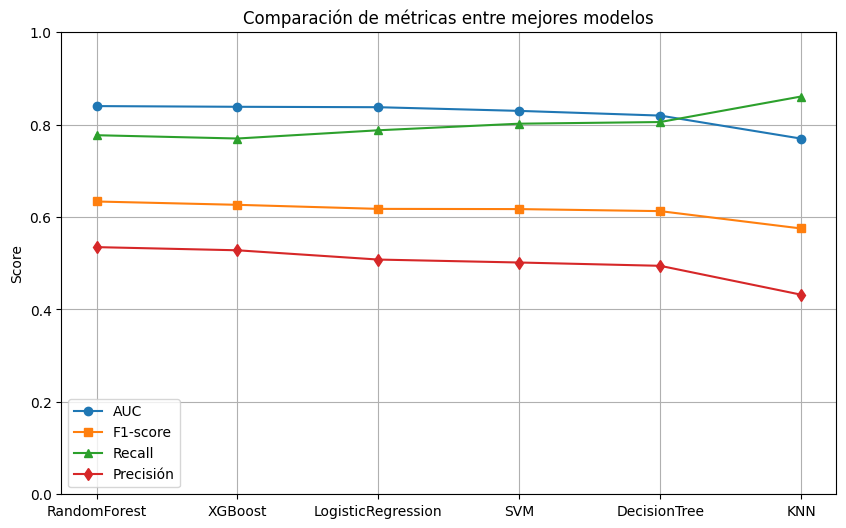

📌 *Motivo principal:* El modelo RandomForest tiene mejor **F1-score** (+0.72%), equilibrando precisión y recall para un buen rendimiento general.


{'mejor_modelo': {'Modelo': 'RandomForest',
  'AUC': np.float64(0.8402275517871918),
  'F1': 0.6337209302325582,
  'Accuracy': 0.7611374407582938,
  'Recall': 0.7771836007130125,
  'Precision': 0.5349693251533743},
 'explicacion': '📌 *Motivo principal:* El modelo RandomForest tiene mejor **F1-score** (+0.72%), equilibrando precisión y recall para un buen rendimiento general.'}

In [129]:
comparar_mejores_modelos(dic_mejores_modelos)

In [130]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_diferencias_metricas(modelos_resultados, umbral=0.15):
    nombres_modelos = []
    diferencias_signed = {
        'f1': [],
        'recall': [],
        'auc': []
    }

    for res in modelos_resultados:
        nombres_modelos.append(res["model"])
        diag = res["resultado"]["diagnostico"]["diferencias_metricas_signed"]
        for metrica in diferencias_signed:
            diferencias_signed[metrica].append(diag.get(metrica, 0))

    x = np.arange(len(nombres_modelos))
    ancho = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))

    # Crear las 3 barras con signo
    for i, metrica in enumerate(['f1', 'recall', 'auc']):
        ax.bar(x + i * ancho, diferencias_signed[metrica], width=ancho, label=metrica.capitalize())

    # Líneas de umbral (positivas para overfitting, negativas para underfitting)
    ax.axhline(umbral, color='red', linestyle='--', linewidth=1, label='Umbral Overfitting')
    ax.axhline(-umbral, color='blue', linestyle='--', linewidth=1, label='Umbral Underfitting')

    ax.set_xticks(x + ancho)
    ax.set_xticklabels(nombres_modelos)
    ax.set_ylabel("Diferencia (Train - Test)")
    ax.set_title("Diferencias métricas (Train - Test) con signo")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.3)
    plt.axhline(0, color='black', linewidth=0.8)  # Línea base
    plt.tight_layout()
    plt.show()



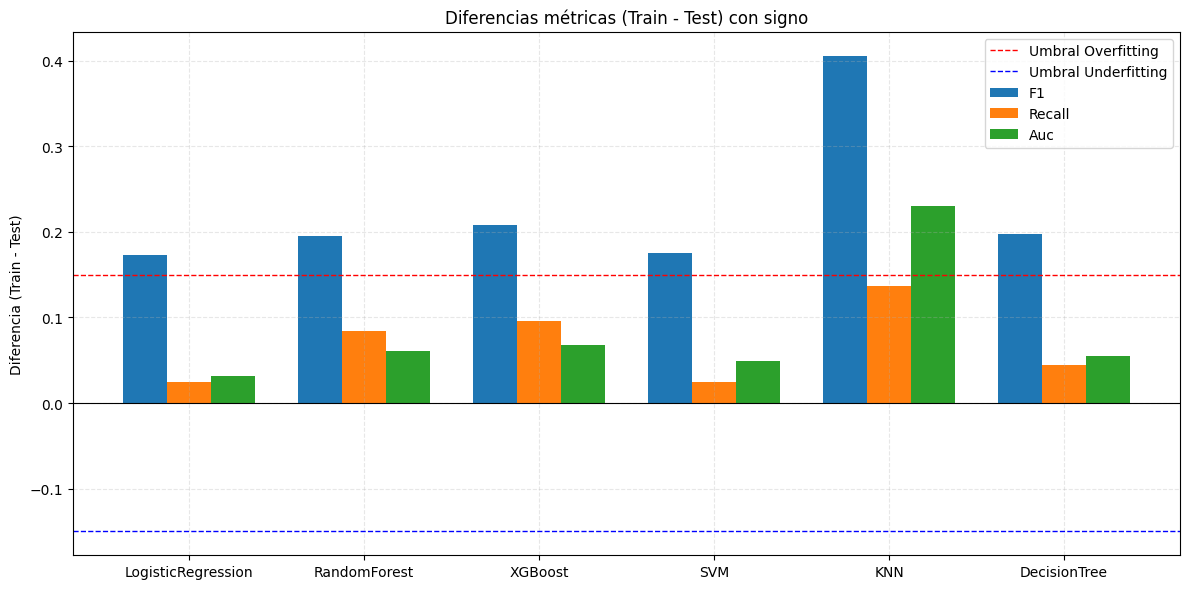

In [131]:
graficar_diferencias_metricas(dic_mejores_modelos)

In [132]:
import matplotlib.pyplot as plt

def graficar_overfitting_underfitting(modelos_resultados):
    nombres_modelos = []
    diferencias_signed = {"f1": [], "recall": [], "auc": []}

    for res in modelos_resultados:
        nombres_modelos.append(res["model"])
        diag = res["resultado"]["diagnostico"]["diferencias_metricas_signed"]  # ← nuevo campo con signo
        print(diag)
        for metrica in diferencias_signed:
            diferencias_signed[metrica].append(diag.get(metrica, 0))

    x = range(len(nombres_modelos))
    width = 0.2

    plt.figure(figsize=(10, 6))
    plt.bar([p - width for p in x], diferencias_signed["f1"], width, label="F1")
    plt.bar(x, diferencias_signed["recall"], width, label="Recall")
    plt.bar([p + width for p in x], diferencias_signed["auc"], width, label="AUC")

    plt.axhline(0.0, color="black", linestyle="-", linewidth=1)
    plt.axhline(0.05, color="orange", linestyle="--", label="Umbral leve")
    plt.axhline(0.15, color="red", linestyle="--", label="Umbral grave")
    plt.axhline(-0.05, color="orange", linestyle="--")
    plt.axhline(-0.15, color="red", linestyle="--")

    plt.xticks(x, nombres_modelos)
    plt.ylabel("Diferencia: Train - Test")
    plt.title("Detección de Overfitting / Underfitting")
    plt.legend()
    plt.tight_layout()
    plt.show()


{'f1': 0.17306650123361722, 'recall': 0.024111898966380996, 'auc': np.float64(0.0321085868986668)}
{'f1': 0.19466410504902887, 'recall': 0.08363543636501736, 'auc': np.float64(0.060279002230587575)}
{'f1': 0.20738029256808554, 'recall': 0.09524667047705548, 'auc': np.float64(0.06803180469765446)}
{'f1': 0.17554949331105052, 'recall': 0.024368986916595947, 'auc': np.float64(0.04931870344213696)}
{'f1': 0.4057450046957479, 'recall': 0.13703342513904815, 'auc': np.float64(0.22963120050244246)}
{'f1': 0.19721345723009442, 'recall': 0.0449547581577554, 'auc': np.float64(0.05536994082677715)}


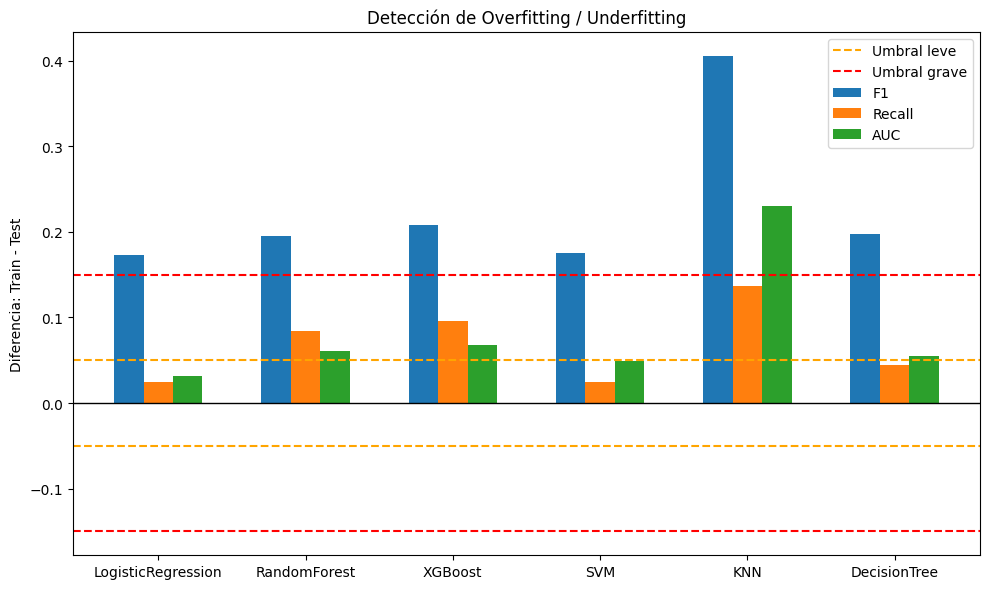

In [133]:
graficar_overfitting_underfitting(dic_mejores_modelos)

**Explicación gráfico Detección de Overfitting / Underfitting**

- Si la barra es positiva, hay potencial overfitting.
- Si la barra es negativa, hay potencial underfitting.
- La magnitud (altura) indica la gravedad del desajuste.
- Las líneas de umbral leve y grave permiten ver si la diferencia está en zona tolerable.



## Análisis de Métricas

In [139]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_metricas_entrenamiento_vs_test(modelos_resultados, formato_salida="texto", umbral_over=0.15, umbral_under=-0.15):
    """
    Compara visualmente métricas de entrenamiento vs test entre múltiples modelos.

    Parámetros:
    - modelos_resultados: lista con los resultados de modelos (de tipo buscar_mejor_modelo_con_balanceo_...)
    - umbral_over: diferencia considerada como indicio de overfitting (default=0.15)
    - umbral_under: diferencia considerada como indicio de underfitting (default=-0.15)
    - formato_salida: "texto" para salida legible o "markdown" para salida formateada para README
    """

    metricas = ['f1', 'recall', 'auc', 'precision', 'accuracy']
    modelos = [res['model'] for res in modelos_resultados]

    # Extraer diferencias
    diferencias = {met: [] for met in metricas}
    for res in modelos_resultados:
        train = res['resultado'].get('metricas_train', {})
        test = res['resultado'].get('metricas', {})
        for met in metricas:
            val_train = train.get(met, 0)
            val_test = test.get(f'test_{met}', 0)
            diferencias[met].append(val_train - val_test)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 6))
    ancho = 0.15
    x = np.arange(len(modelos))

    for i, met in enumerate(metricas):
        valores = diferencias[met]
        color_barras = [
            '#e74c3c' if v > umbral_over else '#3498db' if v < umbral_under else '#2ecc71'
            for v in valores
        ]
        ax.bar(x + i * ancho, valores, width=ancho, label=met, color=color_barras)

    # Umbrales visuales
    ax.axhline(umbral_over, color='red', linestyle='--', linewidth=1, label='Overfitting threshold')
    ax.axhline(umbral_under, color='blue', linestyle='--', linewidth=1, label='Underfitting threshold')

    ax.set_xticks(x + ancho * (len(metricas)-1) / 2)
    ax.set_xticklabels(modelos)
    ax.set_ylabel("Diferencia Entrenamiento - Test")
    ax.set_title("Diagnóstico de Overfitting / Underfitting")
    ax.legend(title="Métrica")
    plt.tight_layout()
    plt.grid(axis='y', linestyle=':', alpha=0.5)
    plt.show()

    # Diagnóstico textual o Markdown
    for i, modelo in enumerate(modelos):
        if formato_salida == "markdown":
            print(f"\n### 🧠 Diagnóstico para **{modelo}**")
        else:
            print(f"\n🧠 Diagnóstico para {modelo}:")
        for met in metricas:
            diff = diferencias[met][i]
            if diff > umbral_over:
                texto = f"⚠️ Posible **overfitting** en `{met}` (+{diff:.2%})"
            elif diff < umbral_under:
                texto = f"⚠️ Posible **underfitting** en `{met}` ({diff:.2%})"
            else:
                texto = f"✅ Sin indicios en `{met}` ({diff:.2%})"
            print(f"- {texto}")


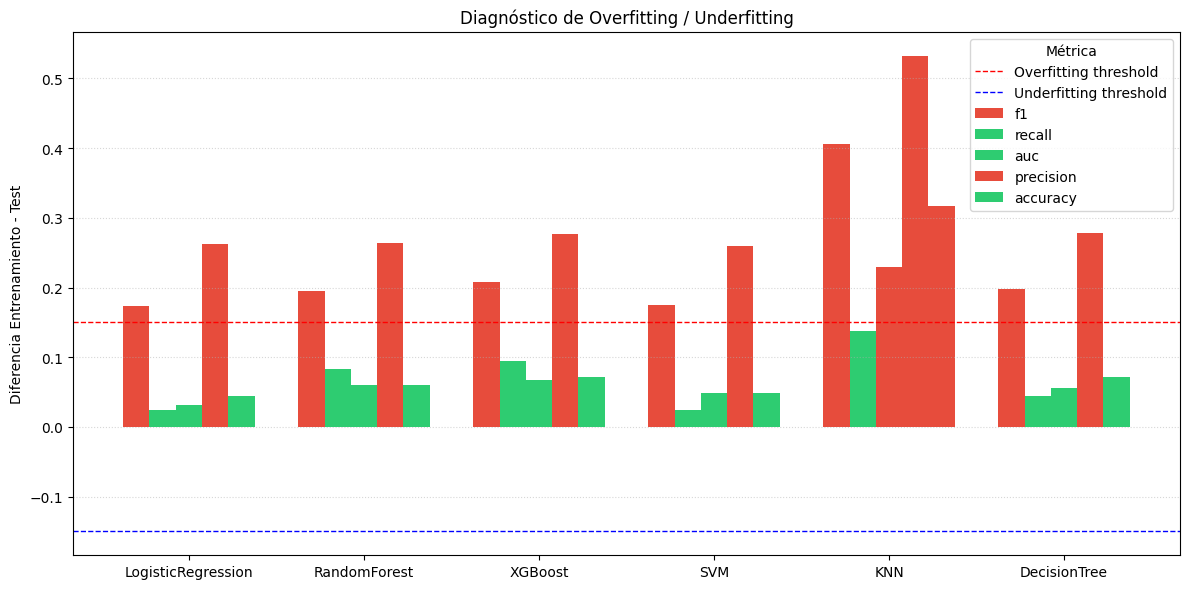


### 🧠 Diagnóstico para **LogisticRegression**
- ⚠️ Posible **overfitting** en `f1` (+17.31%)
- ✅ Sin indicios en `recall` (2.41%)
- ✅ Sin indicios en `auc` (3.21%)
- ⚠️ Posible **overfitting** en `precision` (+26.27%)
- ✅ Sin indicios en `accuracy` (4.45%)

### 🧠 Diagnóstico para **RandomForest**
- ⚠️ Posible **overfitting** en `f1` (+19.47%)
- ✅ Sin indicios en `recall` (8.36%)
- ✅ Sin indicios en `auc` (6.03%)
- ⚠️ Posible **overfitting** en `precision` (+26.33%)
- ✅ Sin indicios en `accuracy` (6.05%)

### 🧠 Diagnóstico para **XGBoost**
- ⚠️ Posible **overfitting** en `f1` (+20.74%)
- ✅ Sin indicios en `recall` (9.52%)
- ✅ Sin indicios en `auc` (6.80%)
- ⚠️ Posible **overfitting** en `precision` (+27.66%)
- ✅ Sin indicios en `accuracy` (7.17%)

### 🧠 Diagnóstico para **SVM**
- ⚠️ Posible **overfitting** en `f1` (+17.55%)
- ✅ Sin indicios en `recall` (2.44%)
- ✅ Sin indicios en `auc` (4.93%)
- ⚠️ Posible **overfitting** en `precision` (+26.01%)
- ✅ Sin indicios en `accuracy` (4.85%)


In [140]:
graficar_metricas_entrenamiento_vs_test(dic_mejores_modelos, "markdown")

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

def graficar_matriz_confusion_estandar(dic_modelo, X_test, y_test, escala=1.0, guardar_como=None):
    """
    Genera y muestra la matriz de confusión de un modelo entrenado.

    Parámetros:
    - dic_modelo (dict): Diccionario del modelo (como los devueltos por funciones buscar_mejor_modelo_...).
    - X_test, y_test: Datos reales de test.
    - escala (float): Factor para escalar el tamaño del gráfico (1.0 por defecto).
    - guardar_como (str): Ruta y nombre de archivo para guardar el gráfico (ej: 'matrices/matriz_rf.png').

    Retorna:
    - cm (np.ndarray): Matriz de confusión.
    """

    modelo_entrenado = dic_modelo["resultado"]["modelo"]
    nombre_modelo = dic_modelo["model"]

    # Predicciones
    y_pred = modelo_entrenado.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    etiquetas = ["Negativo (Clase 0)", "Positivo (Clase 1)"]

    # Crear gráfico
    fig_width = 6 * escala
    fig_height = 5 * escala

    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=etiquetas, yticklabels=etiquetas)
    plt.title(f"Matriz de Confusión - {nombre_modelo}", fontsize=12 * escala)
    plt.xlabel("Predicción", fontsize=10 * escala)
    plt.ylabel("Valor Real", fontsize=10 * escala)
    plt.tight_layout()

    # Guardar si se indicó ruta
    if guardar_como:
        os.makedirs(os.path.dirname(guardar_como), exist_ok=True)
        plt.savefig(guardar_como, dpi=300)
        print(f"📁 Gráfico guardado en: {guardar_como}")

    plt.show()

    return cm


📁 Gráfico guardado en: matrices/matriz_xgb.png


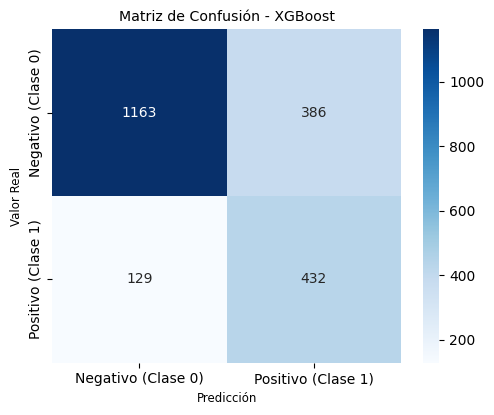

array([[1163,  386],
       [ 129,  432]])

In [149]:
graficar_matriz_confusion_estandar(mejor_xgb, X_test, y_test, 0.85, "matrices/matriz_xgb.png")

**Regresión Logística**

#Encoding

# Normalización o Estandarización

## 🎯 Correlación y Selección de Variables ##

#Análisis de Correlación#